In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_read = pd.read_csv("/content/EDA terrorism analysis.csv",low_memory=False,encoding="ISO-8859-1")
dataset_read.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


DATASET UPDATED


In [3]:
dataset_updated=dataset_read.rename(columns={'iyear':'year','imonth':'month','extended':'extend_date','iday':'day','country_txt':'country_name',
                   'provstate':'state', 'country':'country_code','region':'region_code','city':'city','region_txt':'region_name','attacktype1_txt':'attack_type','target1':'specific_target',
                   'nkill':'killed','nwound':'wounded','summary':'summary','gname':'gang','targtype1':'target_code',
                   'targtype1_txt':'target_type','weaptype1_txt':'weapon_type','weaptype1':'weapon_Code','motive':'motive'})

In [4]:
dataset_updated

,eventid,year,month,day,approxdate,extend_date,resolution,country_code,country_name,region_code,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18908,1.983050e+11,1983,5,27,NaN,0,NaN,110,Lebanon,10,...,NaN,NaN,NaN,NaN,PGIS,1.0,0.0,1.0,1.0,NaN
18909,1.983050e+11,1983,5,27,NaN,0,NaN,110,Lebanon,10,...,NaN,NaN,NaN,NaN,PGIS,1.0,0.0,1.0,1.0,NaN
18910,1.983050e+11,1983,5,27,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,0.0,1.0,NaN
18911,1.983050e+11,1983,5,27,NaN,0,NaN,159,Peru,3,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN


In [5]:
dataset_updated=dataset_updated[['year','month','extend_date','day','country_name','state','country_code','region_code','city','region_name','attack_type','specific_target','killed','wounded','success','summary','gang','target_code','target_type','weapon_type','weapon_Code','motive']]


In [6]:
dataset_updated.head()

,year,month,extend_date,day,country_name,state,country_code,region_code,city,region_name,...,killed,wounded,success,summary,gang,target_code,target_type,weapon_type,weapon_Code,motive
0,1970,7,0,2,Dominican Republic,NaN,58,2,Santo Domingo,Central America & Caribbean,...,1.0,0.0,1.0,NaN,MANO-D,14.0,Private Citizens & Property,Unknown,13.0,NaN
1,1970,0,0,0,Mexico,Federal,130,1,Mexico city,North America,...,0.0,0.0,1.0,NaN,23rd of September Communist League,7.0,Government (Diplomatic),Unknown,13.0,NaN
2,1970,1,0,0,Philippines,Tarlac,160,5,Unknown,Southeast Asia,...,1.0,0.0,1.0,NaN,Unknown,10.0,Journalists & Media,Unknown,13.0,NaN
3,1970,1,0,0,Greece,Attica,78,8,Athens,Western Europe,...,NaN,NaN,1.0,NaN,Unknown,7.0,Government (Diplomatic),Explosives,6.0,NaN
4,1970,1,0,0,Japan,Fukouka,101,4,Fukouka,East Asia,...,NaN,NaN,1.0,NaN,Unknown,7.0,Government (Diplomatic),Incendiary,8.0,NaN


YEAR


In [7]:
dataset_updated['year'].value_counts()

1979    2662
1980    2662
1981    2586
1982    2544
1978    1526
1977    1319
1983    1206
1976     923
1975     740
1970     651
1974     581
1972     568
1973     473
1971     471
1986       1
Name: year, dtype: int64

Text(0.5, 1.0, 'Attack of years')

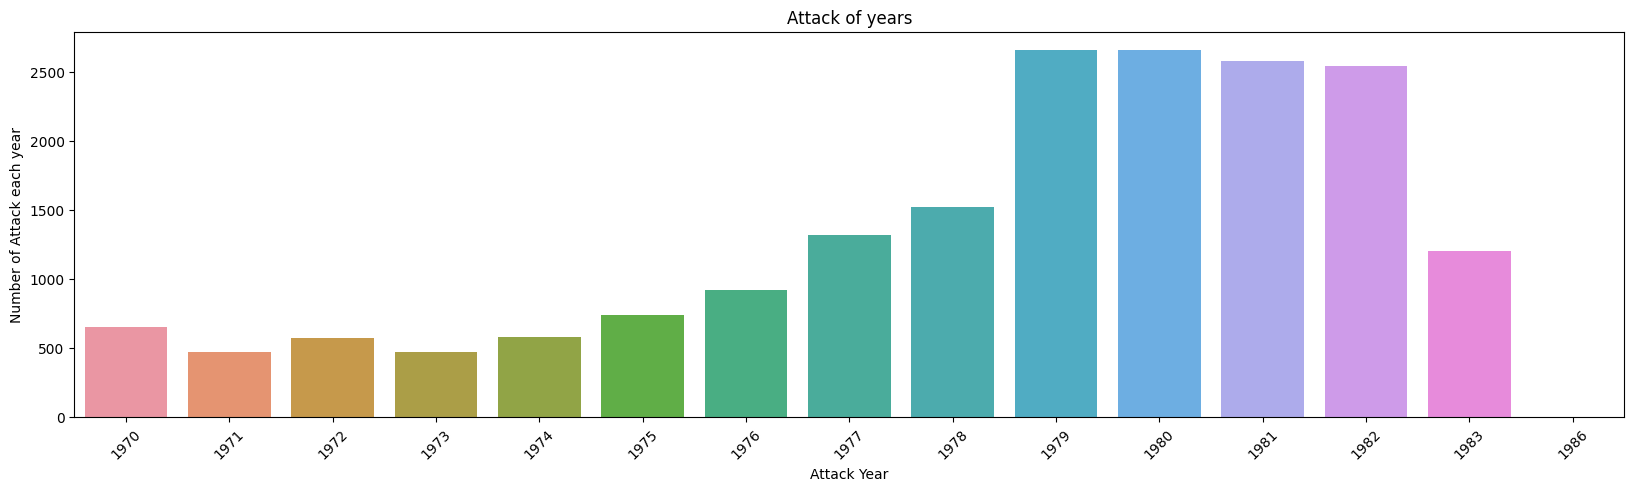

In [8]:
plt.figure(figsize=(20,5));
sns.barplot(x=dataset_updated['year'].value_counts().index, y=dataset_updated['year'].value_counts().values)
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attack each year')
plt.title('Attack of years')


MONTH


In [9]:
dataset_updated['month'].value_counts().max

<bound method NDFrame._add_numeric_operations.<locals>.max of 5     1975
3     1866
1     1760
4     1749
10    1626
2     1568
12    1471
8     1464
6     1438
9     1391
7     1349
11    1237
0       19
Name: month, dtype: int64>

Text(0.5, 1.0, 'most attack in the month')

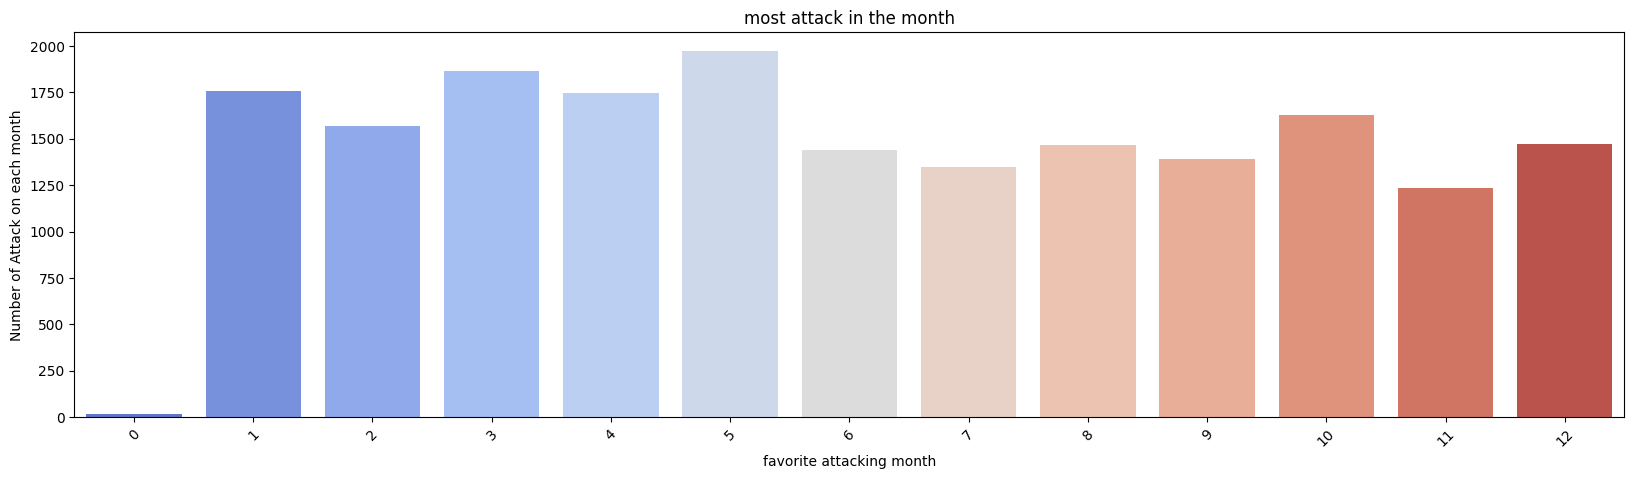

In [10]:
plt.figure(figsize=(20,5));
sns.countplot(x=dataset_updated['month'].sort_index(),palette='coolwarm')
plt.xticks(rotation = 45)
plt.xlabel('favorite attacking month')
plt.ylabel('Number of Attack on each month')
plt.title('most attack in the month')

DAY

In [11]:
dataset_updated['day'].value_counts() .max

<bound method NDFrame._add_numeric_operations.<locals>.max of 1     719
15    698
19    697
17    642
20    641
3     639
27    638
16    636
23    627
4     626
9     625
12    623
14    620
10    618
2     611
28    602
21    598
5     596
13    593
18    585
25    585
11    580
29    567
7     564
26    564
6     560
8     559
22    543
24    539
30    496
0     393
31    329
Name: day, dtype: int64>

Text(0.5, 1.0, 'most attack in the day')

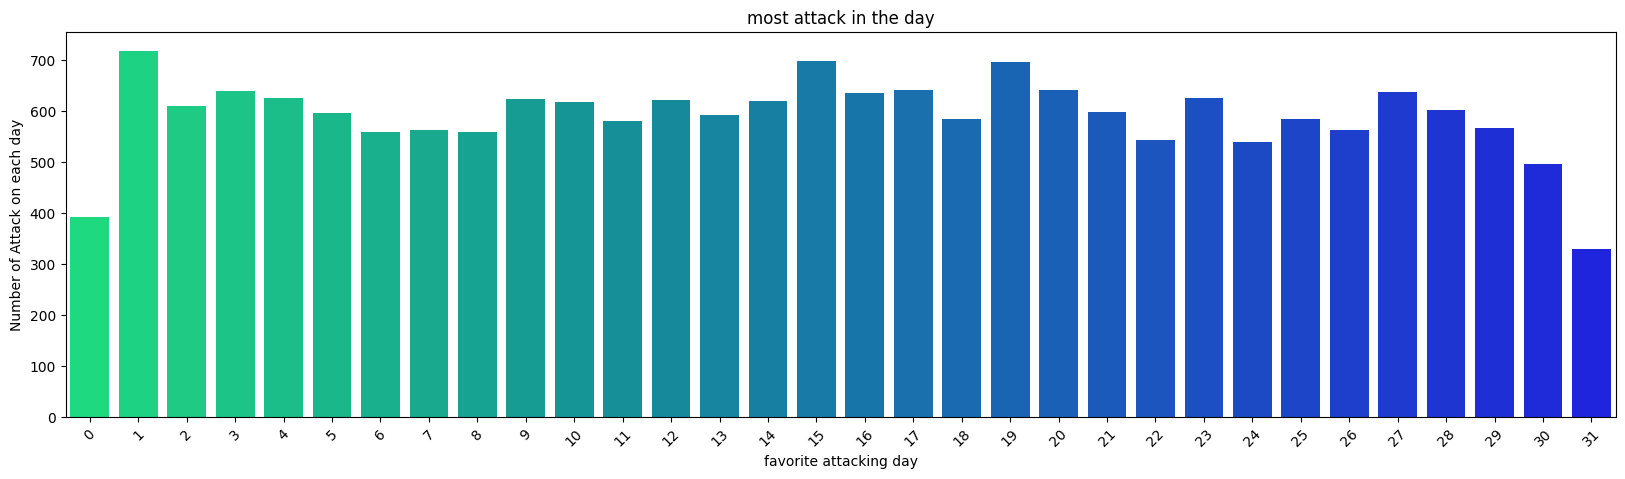

In [12]:
plt.figure(figsize=(20,5));
sns.countplot(x=dataset_updated['day'].sort_index(),palette='winter_r')
plt.xticks(rotation = 45)
plt.xlabel('favorite attacking day')
plt.ylabel('Number of Attack on each day')
plt.title('most attack in the day')

In [13]:
dataset_updated['country_name'] = dataset_updated['country_name'].fillna('unknown')
dataset_updated['country_name'].value_counts().max


<ipython-input-13-06d82d42b09a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_updated['country_name'] = dataset_updated['country_name'].fillna('unknown')


<bound method NDFrame._add_numeric_operations.<locals>.max of El Salvador       2551
United Kingdom    2090
United States     1712
Spain             1375
Italy             1226
                  ... 
New Hebrides         1
Senegal              1
Gabon                1
Malta                1
Iceland              1
Name: country_name, Length: 129, dtype: int64>

Text(0.5, 1.0, 'most attack on the country')

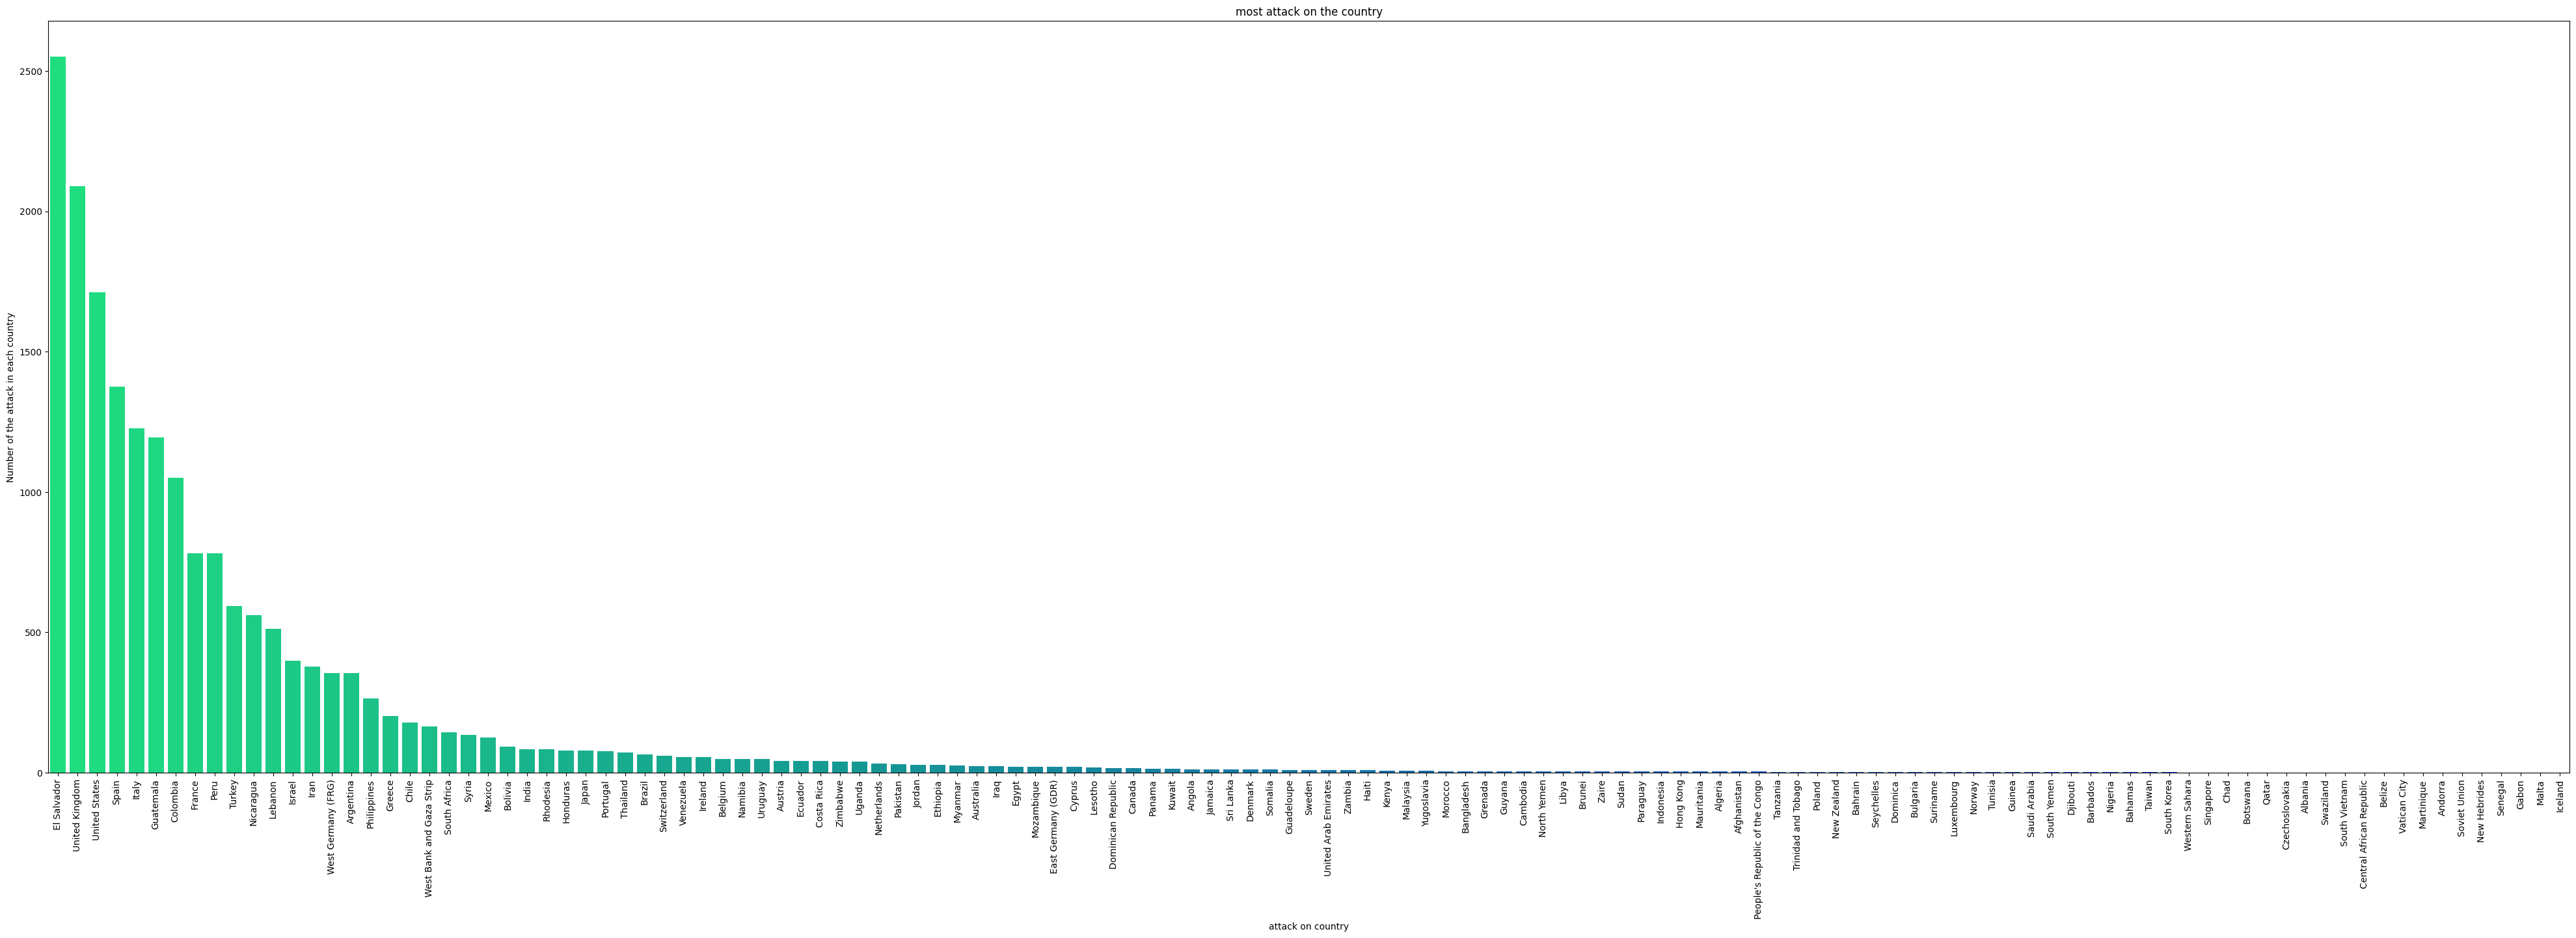

In [14]:
plt.figure(figsize=(50,15));
sns.countplot(x=dataset_updated['country_name'],palette='winter_r',order = dataset_updated['country_name'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('attack on country')
plt.ylabel('Number of the attack in each country')
plt.title('most attack on the country')





REGION NAME

In [15]:
dataset_updated['region_name'].value_counts().max

<bound method NDFrame._add_numeric_operations.<locals>.max of Western Europe                 6395
Central America & Caribbean    4506
South America                  2678
Middle East & North Africa     2307
North America                  1853
Sub-Saharan Africa              501
Southeast Asia                  387
South Asia                      135
East Asia                        87
Eastern Europe                   36
Australasia & Oceania            28
Name: region_name, dtype: int64>

Text(0.5, 1.0, 'Most attack in the region')

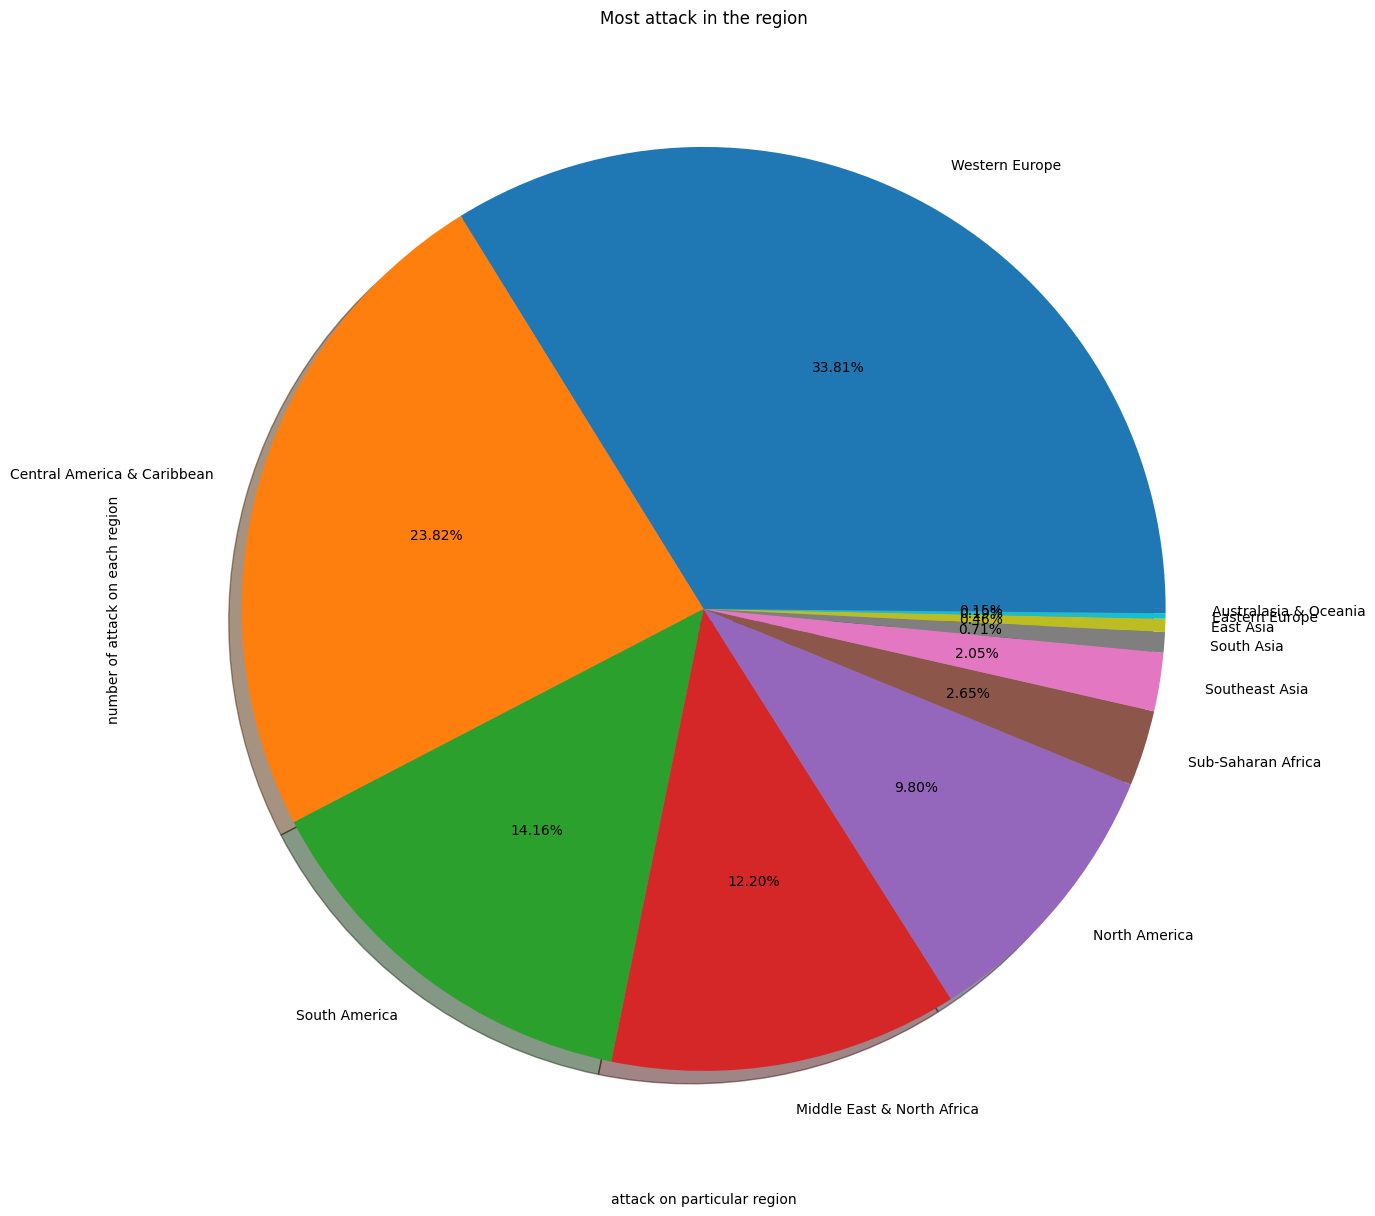

In [16]:
plt.figure(figsize=(90,15));
dataset_updated['region_name'].value_counts().plot.pie(shadow=True, autopct = '%1.2f%%')
plt.xticks(rotation = 90)
plt.xlabel('attack on particular region')
plt.ylabel('number of attack on each region')
plt.title('Most attack in the region')



In [17]:
dataset_updated['state'].value_counts()[:25].max

<bound method NDFrame._add_numeric_operations.<locals>.max of Northern Ireland    1880
San Salvador        1120
Unknown              678
Guatemala            528
Lazio                480
Basque Country       477
California           429
New York             410
Paris                340
Beirut               335
Ayacucho             267
Buenos Aires         264
Bogota               250
Madrid               250
Lima                 231
Lombardy             224
San Vicente          214
England              198
Istanbul             196
Santa Ana            185
Attica               183
Antioquia            182
Tehran               179
Jerusalem            178
Puerto Rico          177
Name: state, dtype: int64>

Text(0.5, 1.0, 'most attack in the state')

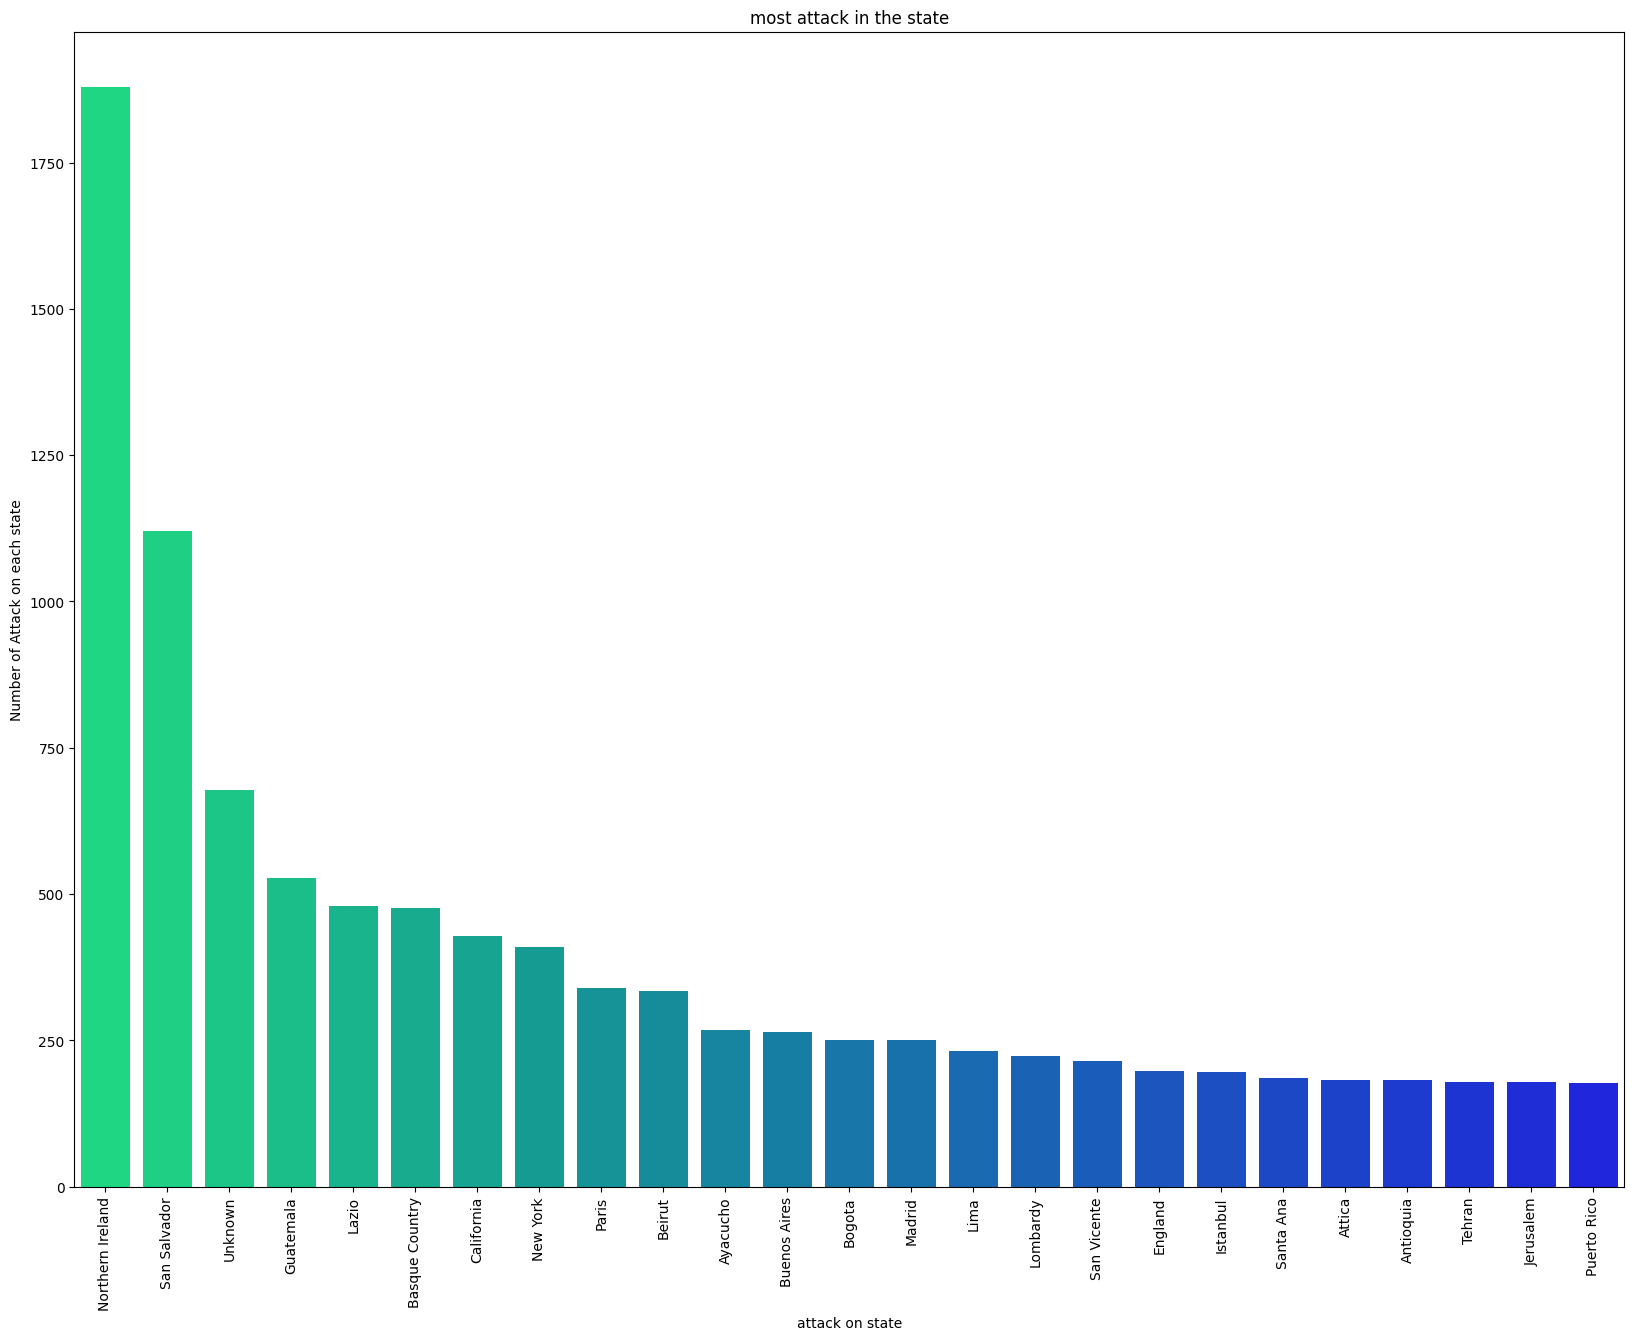

In [18]:
plt.figure(figsize=(20,15));
sns.barplot(x=dataset_updated['state'].value_counts().head(25).index,palette='winter_r',y=dataset_updated["state"].value_counts().head(25).values)
plt.xticks(rotation = 90)
plt.xlabel('attack on state')
plt.ylabel('Number of Attack on each state')
plt.title('most attack in the state')



In [19]:
dataset_updated['state'].value_counts().tail(20).min

<bound method NDFrame._add_numeric_operations.<locals>.min of Barima-Waini                    1
Maputo                          1
Krakow                          1
Delaware                        1
Var                             1
Western Australia               1
Chin                            1
Ceuta                           1
Ohangwena                       1
Puebla                          1
Oran                            1
Meknes-Tafilalet                1
Umtali                          1
Tunis                           1
Australian Capital Territory    1
Gwelo                           1
Erongo                          1
Chubut                          1
Guelmim-Es Semara               1
Ile-de-                         1
Name: state, dtype: int64>

Text(0.5, 1.0, 'least attack in the state')

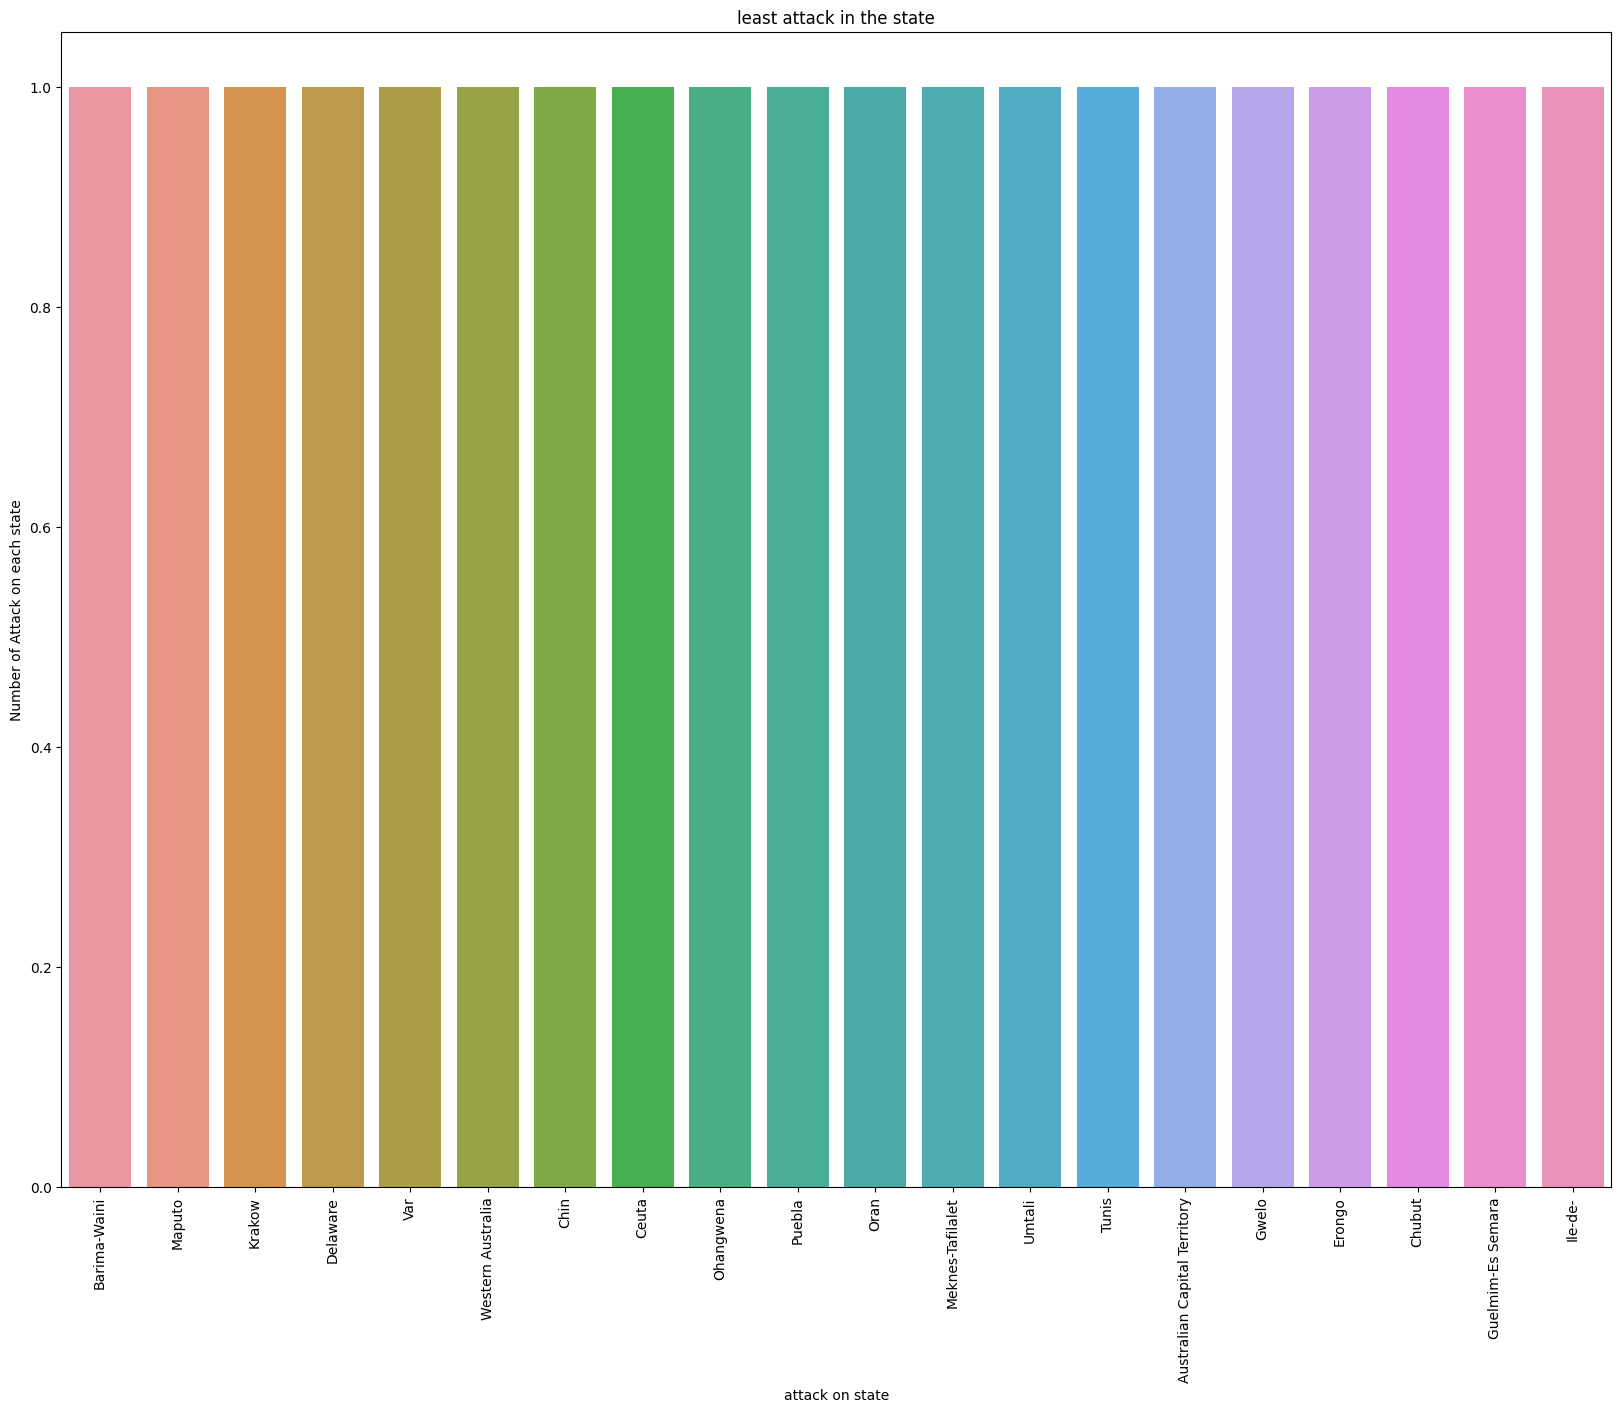

In [20]:
plt.figure(figsize=(20,15));
sns.barplot(x=dataset_updated['state'].value_counts().tail(20).index,y=dataset_updated['state'].value_counts().tail(20).values)
plt.xticks(rotation = 90)
plt.xlabel('attack on state')
plt.ylabel('Number of Attack on each state')
plt.title('least attack in the state')




In [21]:
dataset_updated['city'] = dataset_updated['city'].replace(np.nan, 'unknown')

<ipython-input-21-e1294a41ffc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_updated['city'] = dataset_updated['city'].replace(np.nan, 'unknown')


In [22]:
dataset_updated['city'].value_counts()[:30].max


<bound method NDFrame._add_numeric_operations.<locals>.max of Unknown                   1000
Belfast                    974
San Salvador               921
Rome                       459
Guatemala City             420
Paris                      382
New York City              378
Beirut                     333
Bogota                     248
Madrid                     244
Buenos Aires               225
Istanbul                   192
Lima                       180
Athens                     179
Jerusalem                  176
Tehran                     172
Milan                      155
Ankara                     154
Bilbao                     150
Santa Ana                  149
London                     148
Managua                    137
Santiago                   135
Turin                      126
Donostia-San Sebastian     118
Ayacucho                   111
Londonderry                109
San Juan                   102
Barcelona                  100
Medellin                   100
Name: ci

Text(0.5, 1.0, 'Top 20 city that were attacked')

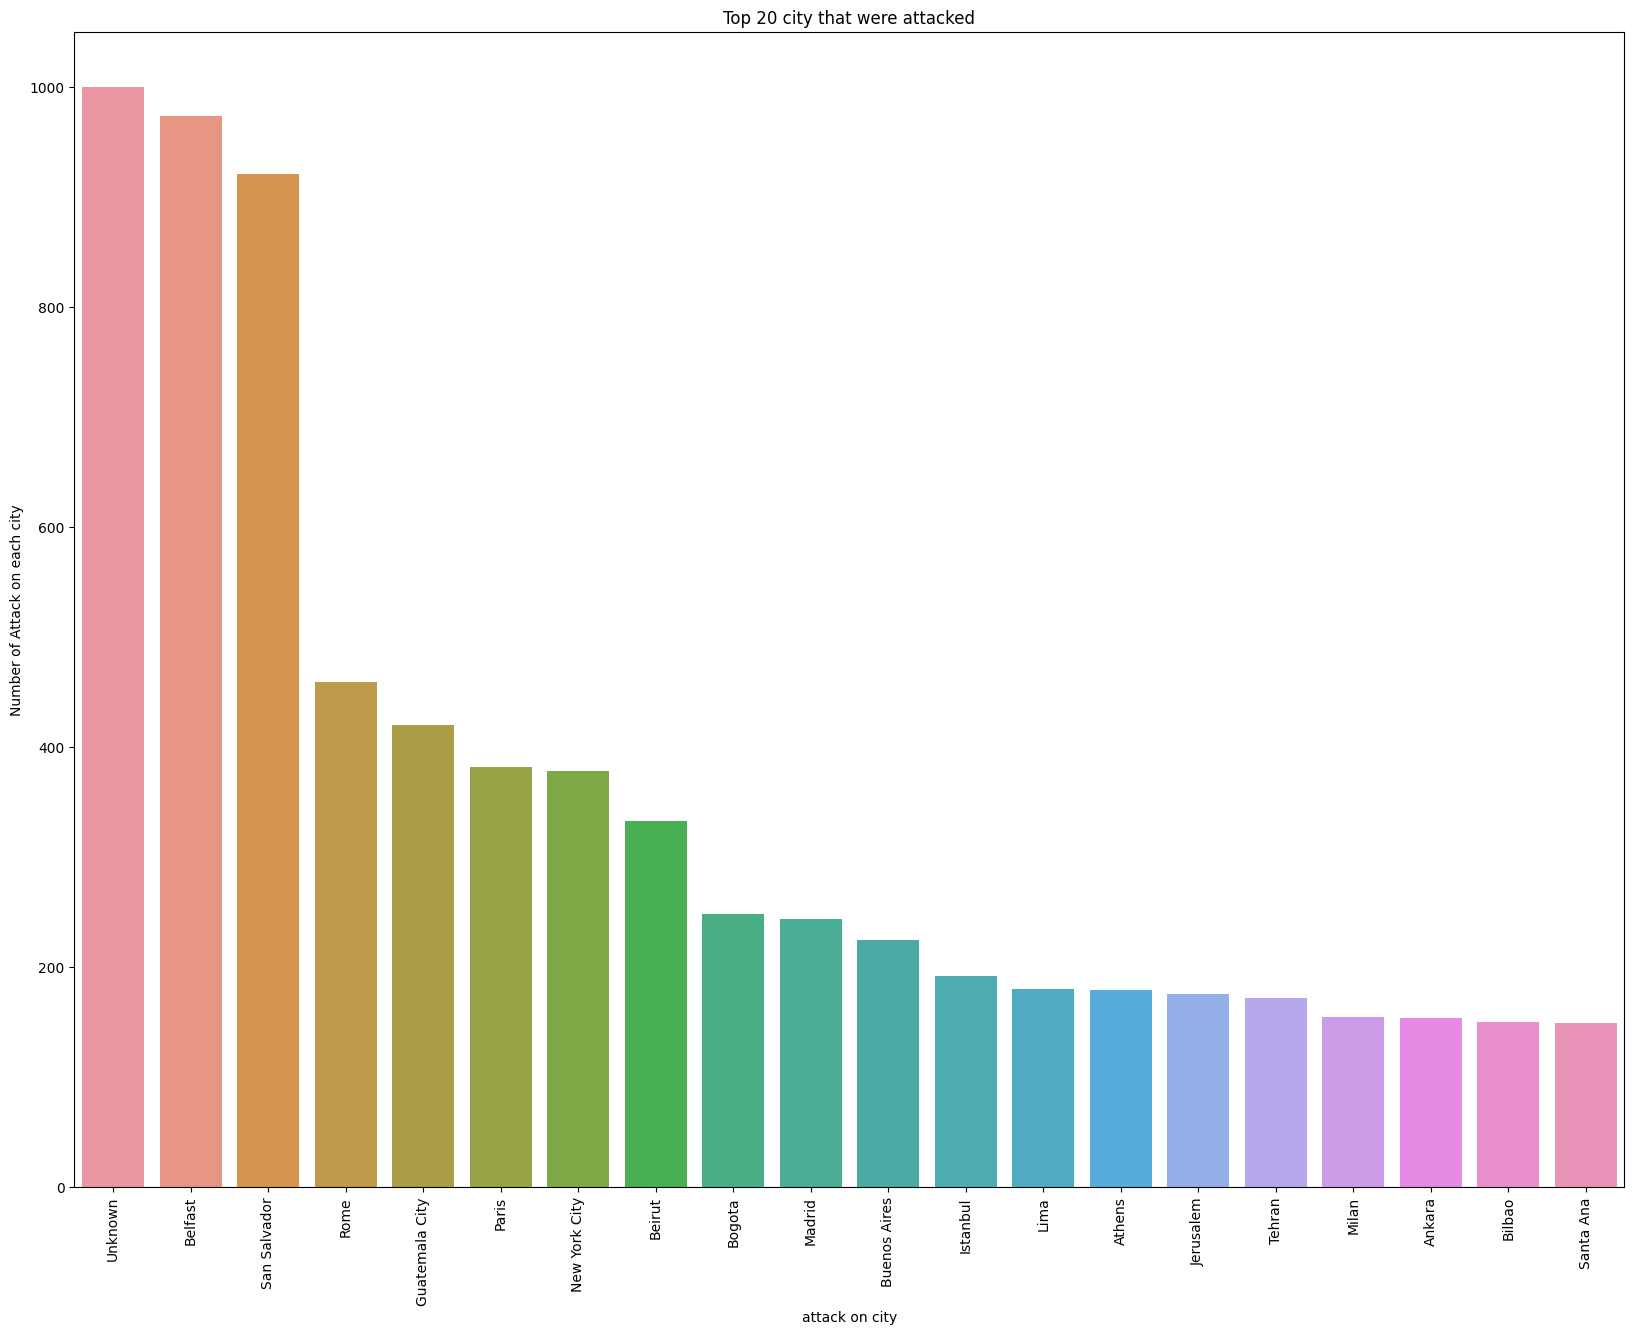

In [23]:
plt.figure(figsize=(20,15));
sns.barplot(x=dataset_updated['city'].value_counts().head(20).index,y=dataset_updated['city'].value_counts().head(20).values)
plt.xticks(rotation = 90)
plt.xlabel('attack on city')
plt.ylabel('Number of Attack on each city')
plt.title('Top 20 city that were attacked')

In [24]:
dataset_updated['city'].value_counts().tail(20).max

<bound method NDFrame._add_numeric_operations.<locals>.max of Patikul         1
Tapul           1
Colon           1
Dabeiba         1
Alto Sinai      1
Aksum           1
Workamba        1
El Tambo        1
Huisito         1
Tanagua         1
Naqoura         1
Moroka          1
Tehuacan        1
Mersin          1
Dipolog         1
La Vaccaja      1
Zeppelinheim    1
Al-Manara       1
El Realejo      1
Mansouriyeh     1
Name: city, dtype: int64>

Text(0.5, 1.0, 'least 20 city that were attacked')

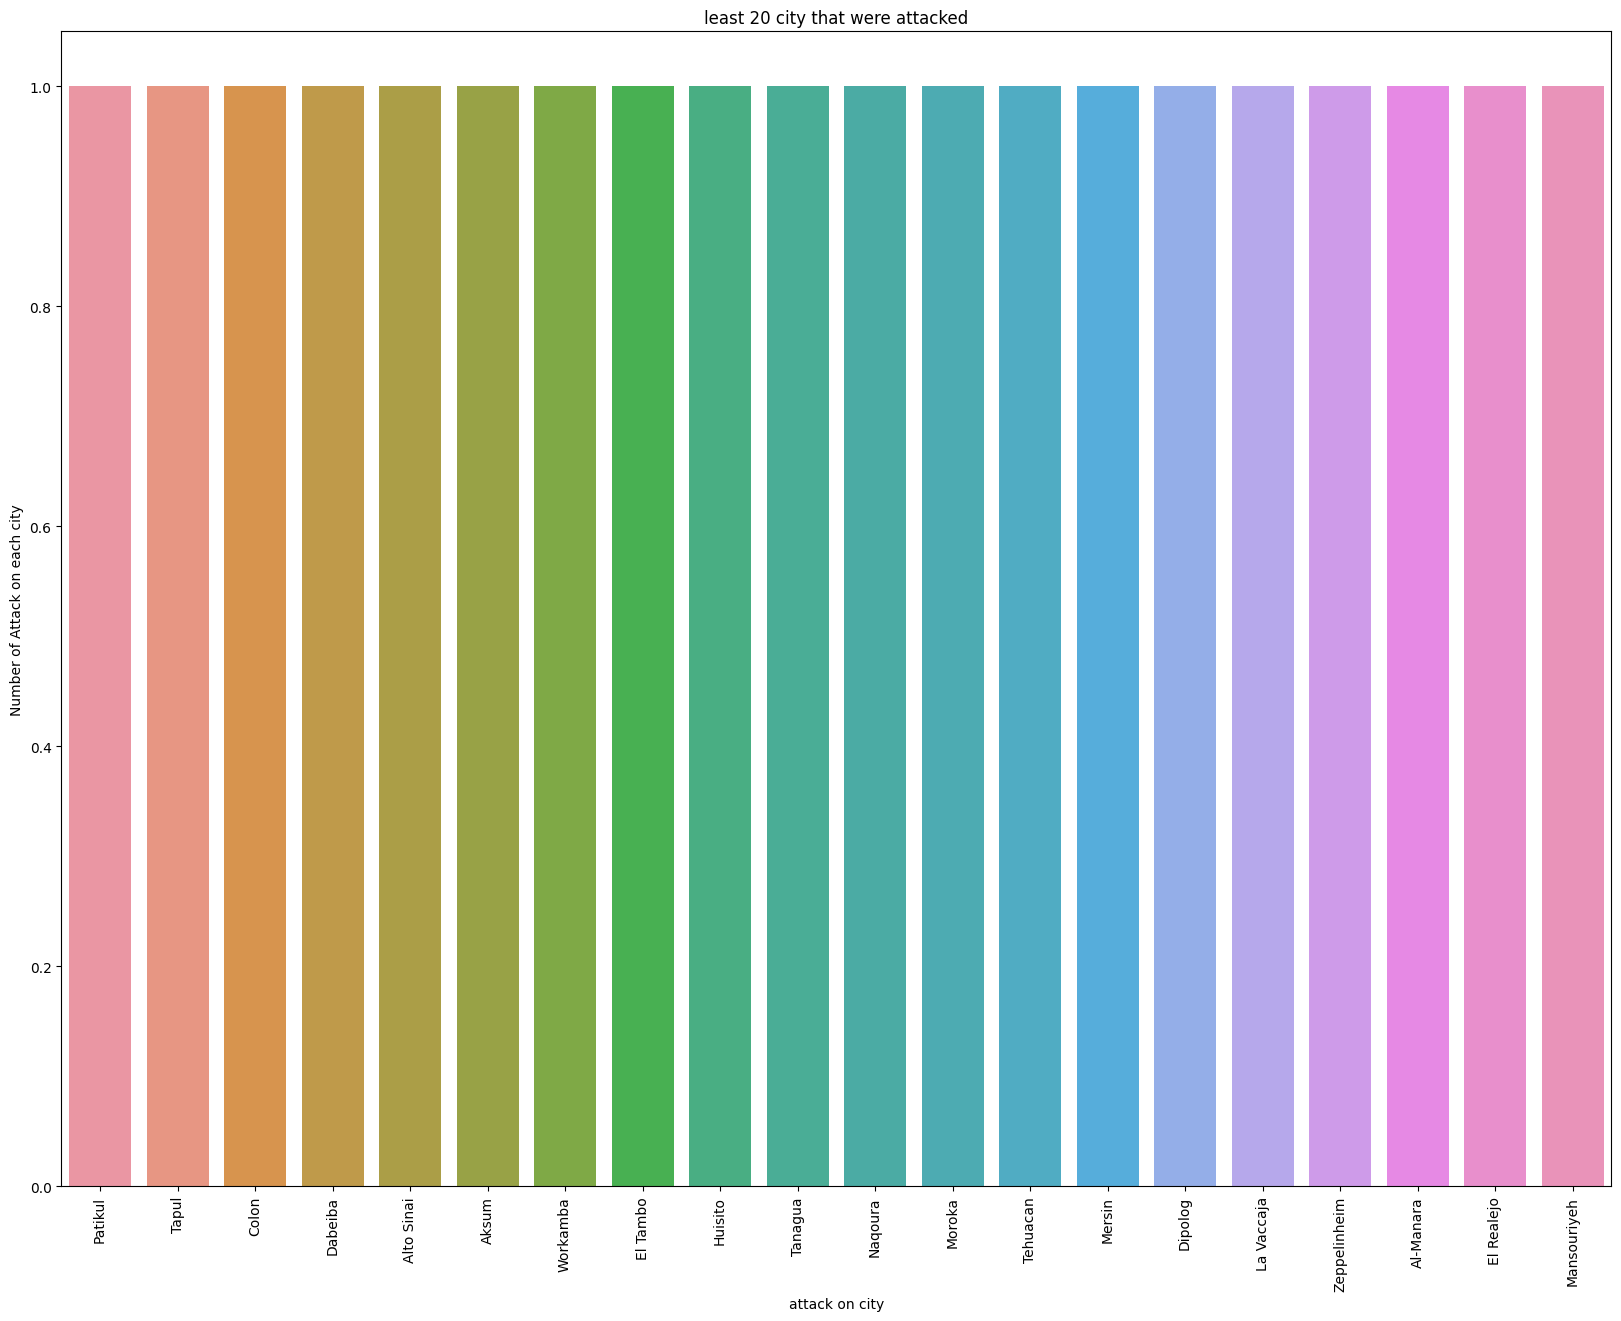

In [25]:
plt.figure(figsize=(20,15));
sns.barplot(x=dataset_updated['city'].value_counts().tail(20).index,y=dataset_updated['city'].value_counts().tail(20).values)
plt.xticks(rotation = 90)
plt.xlabel('attack on city')
plt.ylabel('Number of Attack on each city')
plt.title('least 20 city that were attacked')

In [26]:
dataset_updated['gang'].value_counts().max


<bound method NDFrame._add_numeric_operations.<locals>.max of Unknown                                              6511
Irish Republican Army (IRA)                          1333
Farabundo Marti National Liberation Front (FMLN)      779
Basque Fatherland and Freedom (ETA)                   769
Shining Path (SL)                                     536
                                                     ... 
Armed Proletariat Fighting Squad                        1
Autonomous Groups                                       1
Fighters for the Liberation of the Turkish People       1
ROSADO-SOTO Command                                     1
People's Temple                                         1
Name: gang, Length: 958, dtype: int64>

Text(0.5, 1.0, 'least 20 city that were attacked')

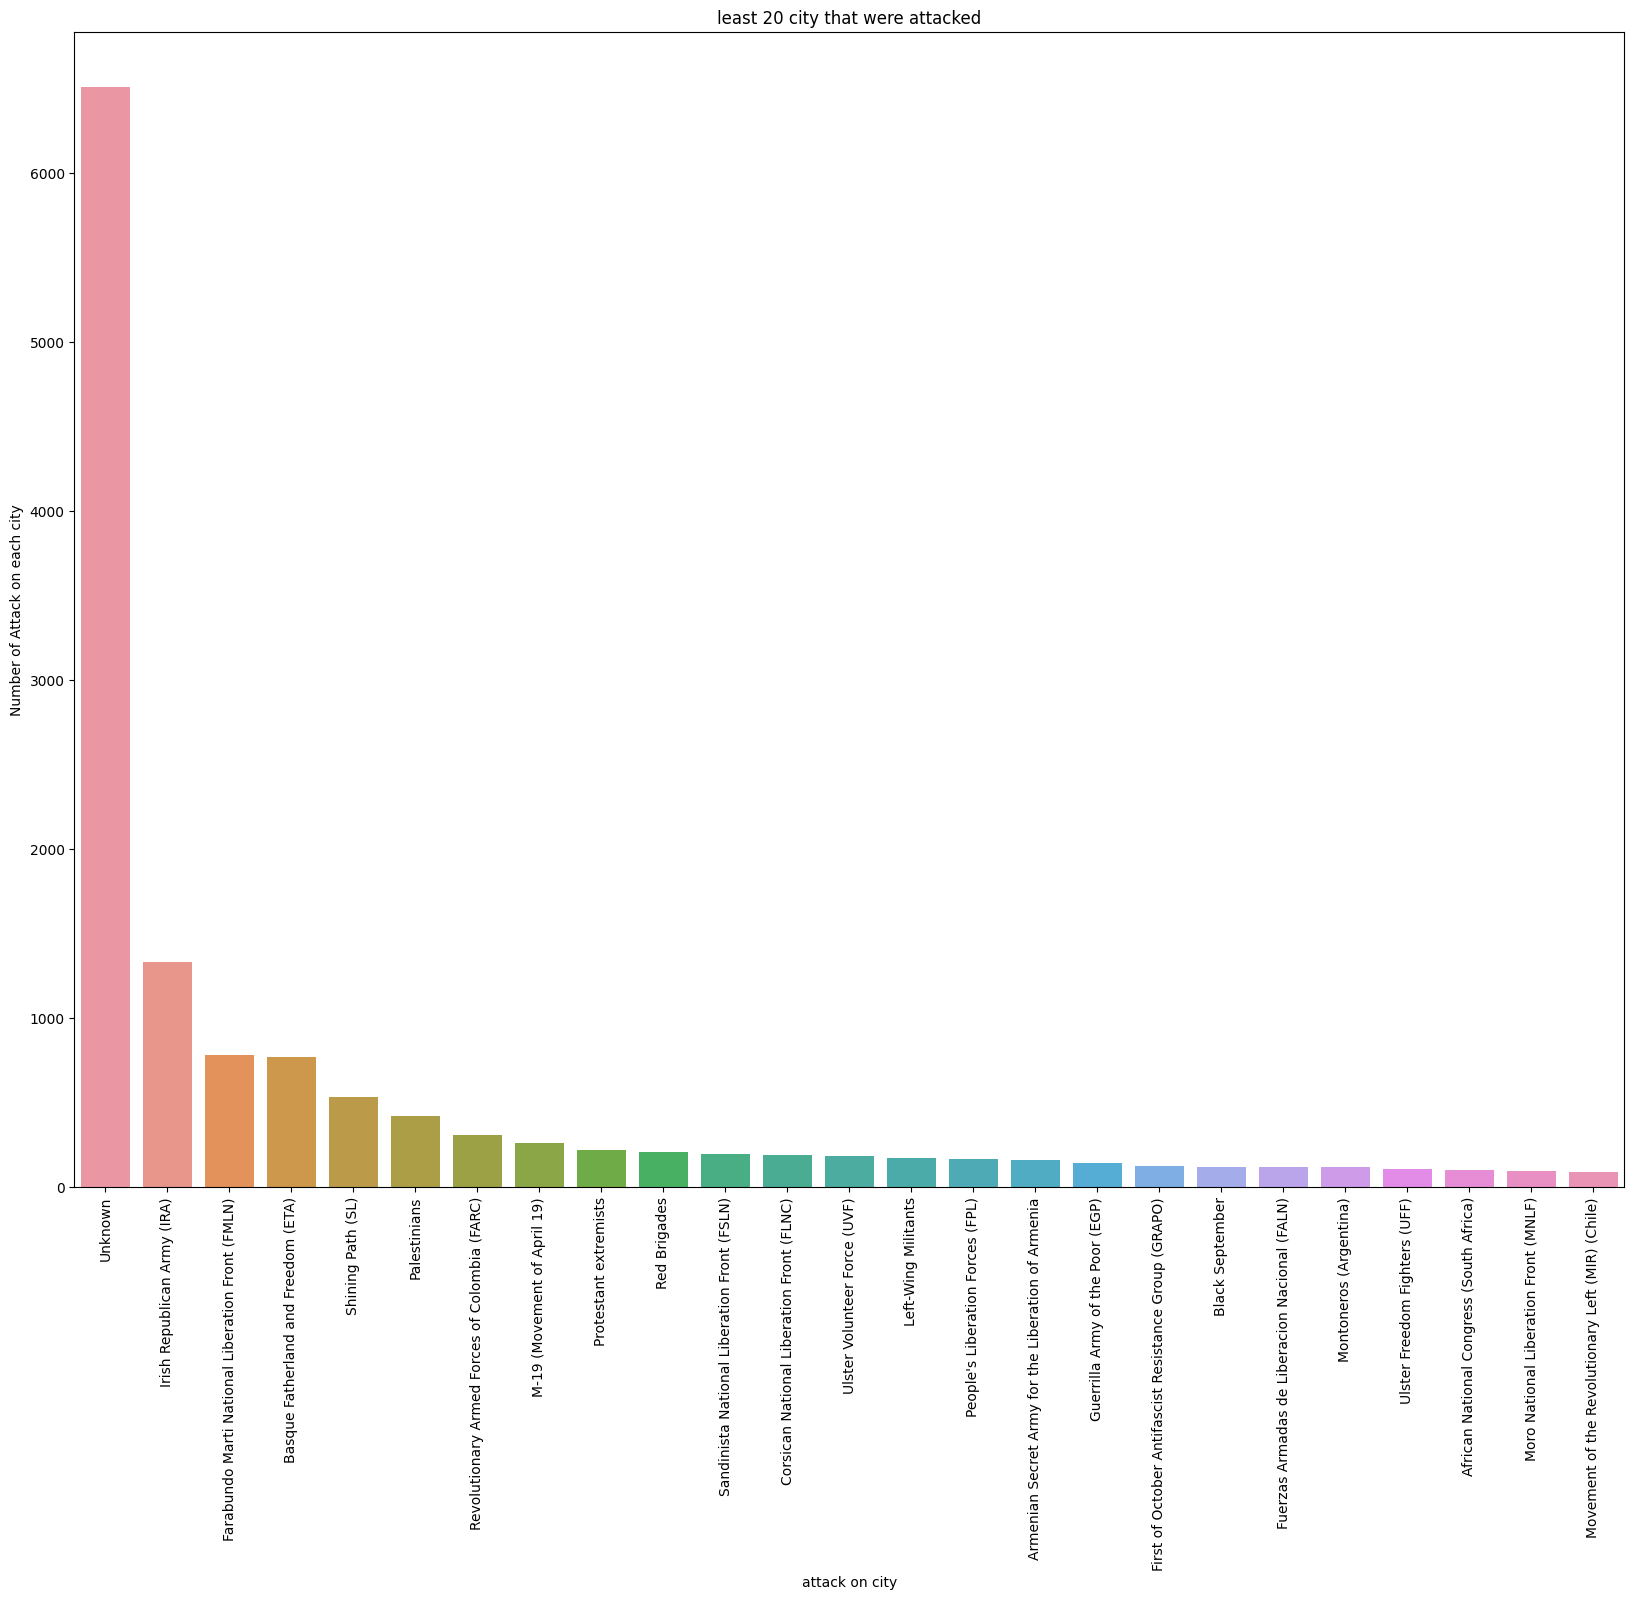

In [27]:
plt.figure(figsize=(20,15));
sns.barplot(x=dataset_updated['gang'].value_counts().head(25).index,y=dataset_updated['gang'].value_counts().head(25).values)
plt.xticks(rotation = 90)
plt.xlabel('attack on city')
plt.ylabel('Number of Attack on each city')
plt.title('least 20 city that were attacked')

In [28]:
dataset_updated['gang'].value_counts().tail(20).min


<bound method NDFrame._add_numeric_operations.<locals>.min of Free Lebanon                                         1
Spanish International Communist Party                1
Communist Territorial Unit                           1
Combatant Communist Front                            1
Rhodesian guerillas                                  1
Basque terrorists                                    1
Politico-Military Revolutionary Command              1
Cambodian National Front for National Salvation      1
People's Army (Nicaragua)                            1
Organized Comrads for Communism                      1
Naga People                                          1
Guards of the Fighting Proletariat                   1
Fedayeen Khalq (People's Commandos)                  1
Fighting Communist Unit                              1
Armed Action Force (FADA)                            1
Armed Proletariat Fighting Squad                     1
Autonomous Groups                                    1
Fig

Text(0.5, 1.0, 'least 20 city that were attacked')

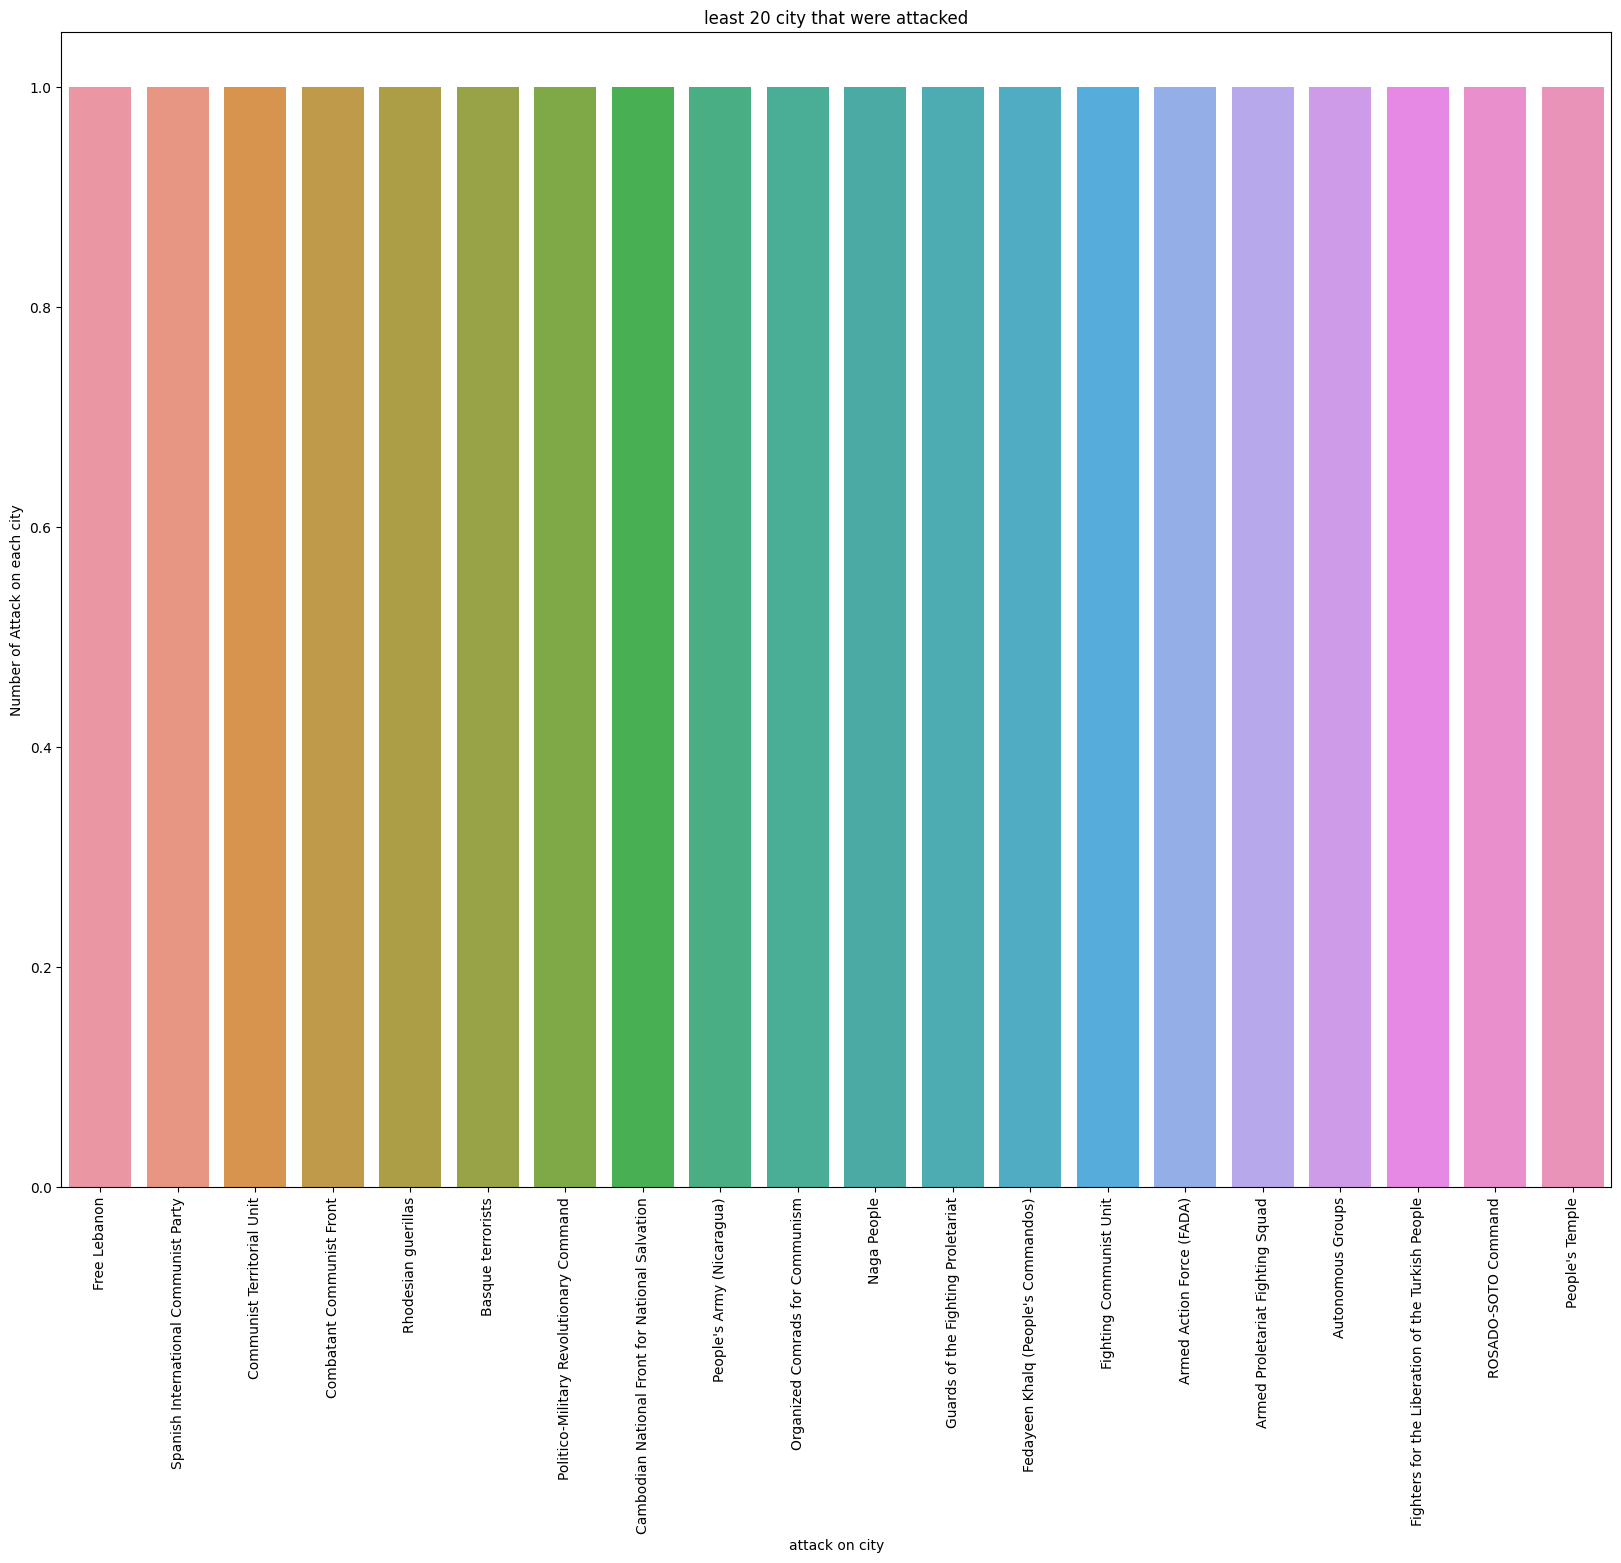

In [29]:
plt.figure(figsize=(20,15));
sns.barplot(x=dataset_updated['gang'].value_counts().tail(20).index,y=dataset_updated['gang'].value_counts().tail(20).values)
plt.xticks(rotation = 90)
plt.xlabel('attack on city')
plt.ylabel('Number of Attack on each city')
plt.title('least 20 city that were attacked')

In [30]:
dataset_updated['target_type'].unique
dataset_updated['target_type'].value_counts()

Business                          3966
Private Citizens & Property       3061
Military                          2617
Government (General)              2301
Police                            1904
Government (Diplomatic)           1058
Transportation                     663
Utilities                          635
Journalists & Media                538
Educational Institution            504
Airports & Aircraft                487
Religious Figures/Institutions     238
Terrorists/Non-State Militia       226
Unknown                            213
Telecommunication                  177
Violent Political Party             92
Tourists                            65
NGO                                 57
Food or Water Supply                45
Maritime                            35
Abortion Related                    22
Other                                8
Name: target_type, dtype: int64

Text(0.5, 1.0, 'target_type')

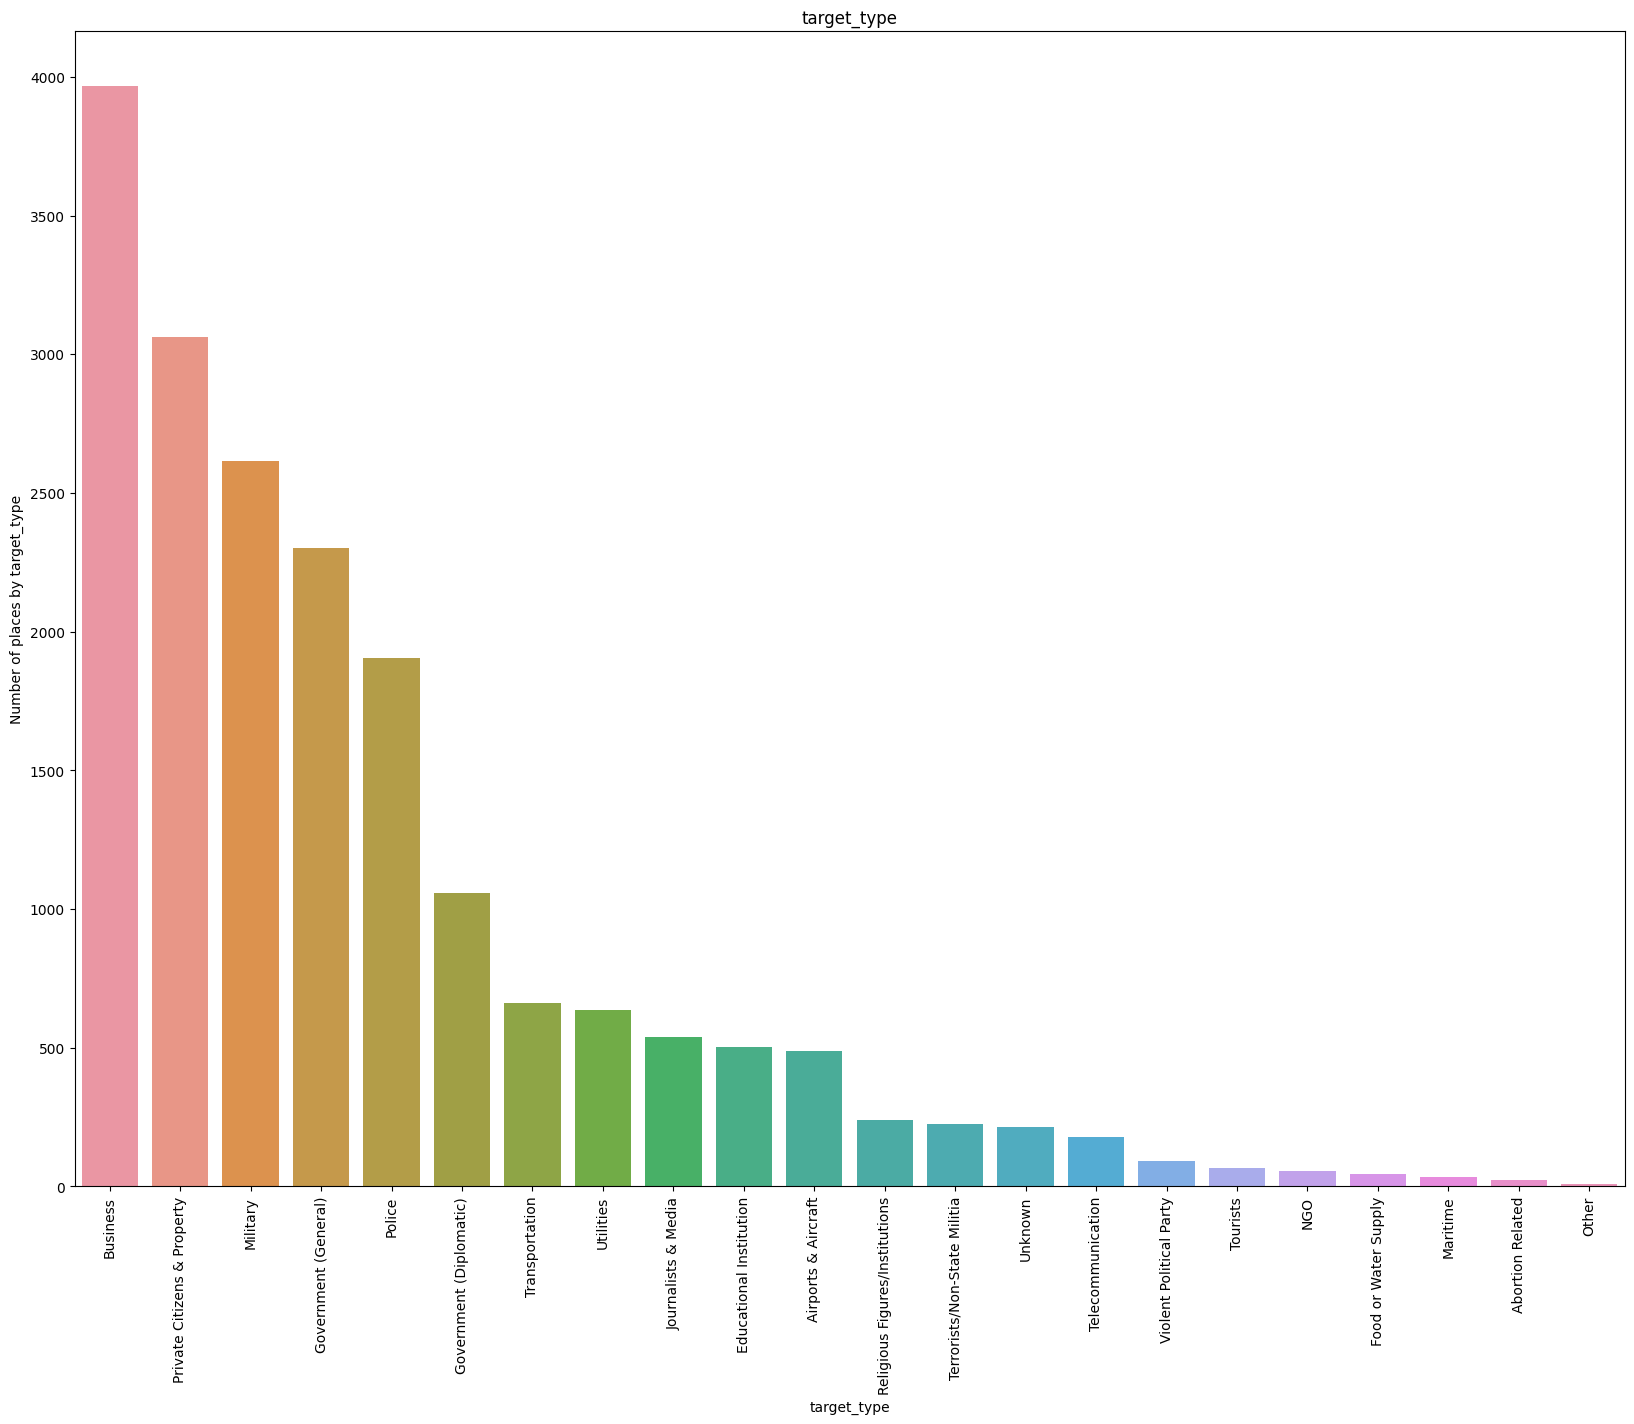

In [31]:
plt.figure(figsize=(20,15));
sns.barplot(x=dataset_updated['target_type'].value_counts().index,y=dataset_updated['target_type'].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel('target_type')
plt.ylabel('Number of places by target_type')
plt.title('target_type')

Text(0.5, 1.0, 'target_name')

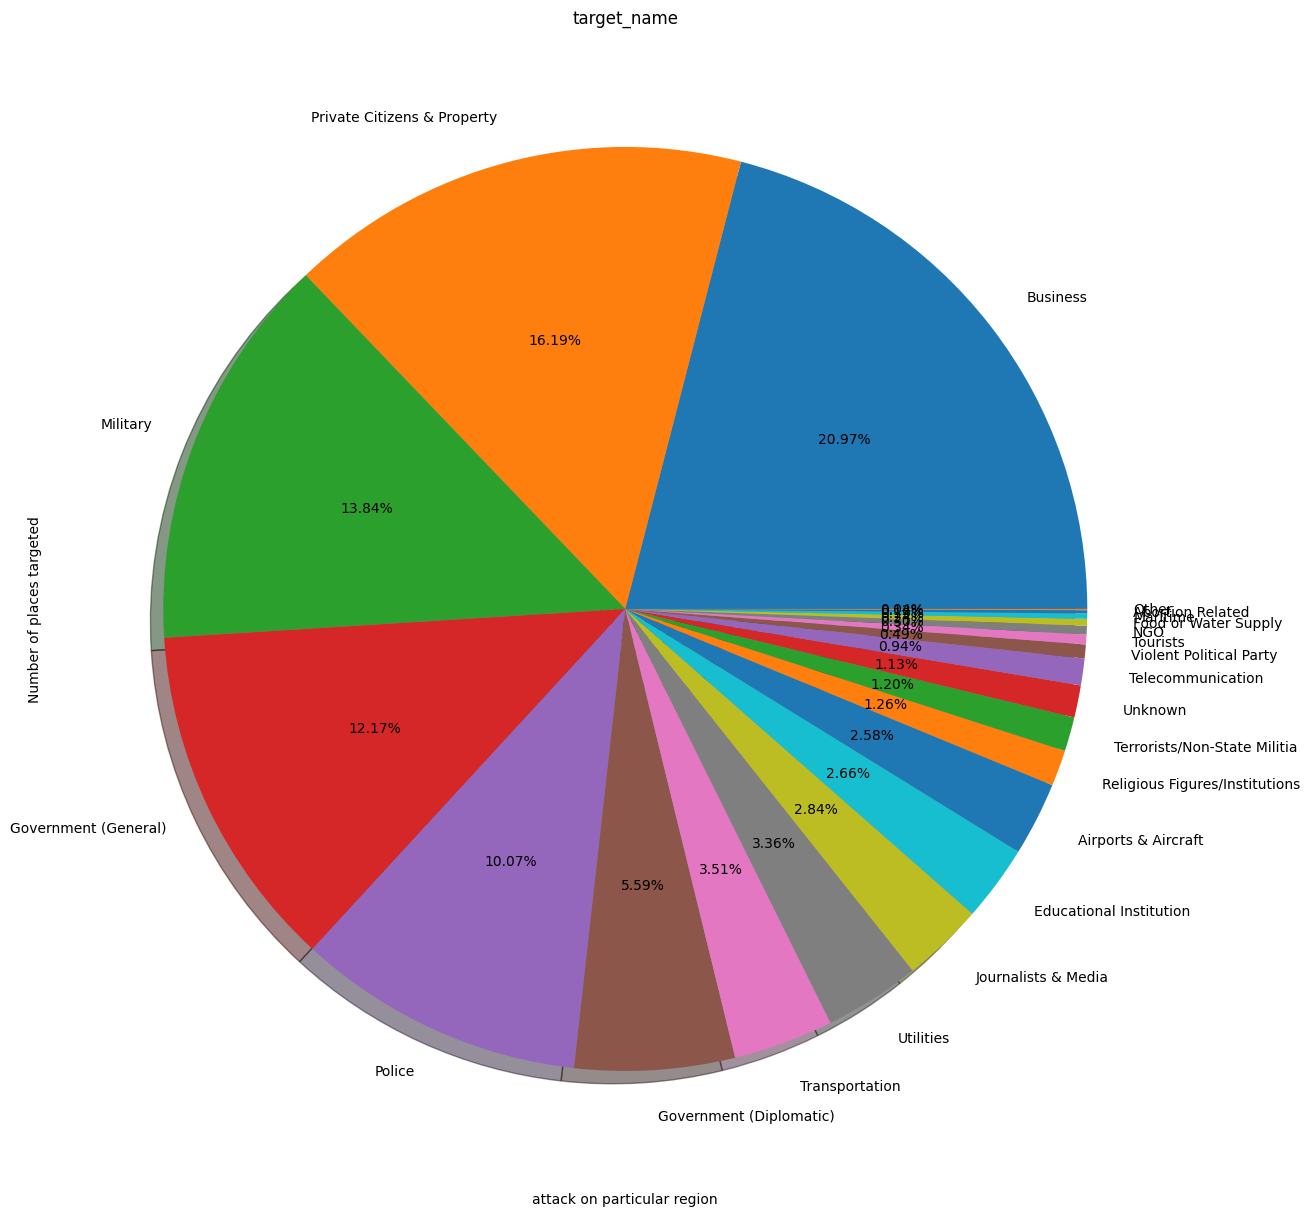

In [32]:
plt.figure(figsize=(90,15));
dataset_updated['target_type'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%')
plt.xlabel('attack on particular region')
plt.ylabel('Number of places targeted')
plt.title('target_name')

In [33]:
dataset_updated['attack_type'].unique
dataset_updated['attack_type'].value_counts()

Bombing/Explosion                      8017
Armed Assault                          3781
Assassination                          3514
Facility/Infrastructure Attack         1613
Hostage Taking (Kidnapping)             959
Unknown                                 575
Hostage Taking (Barricade Incident)     315
Hijacking                               105
Unarmed Assault                          33
Name: attack_type, dtype: int64

Text(0.5, 1.0, 'attack_type')

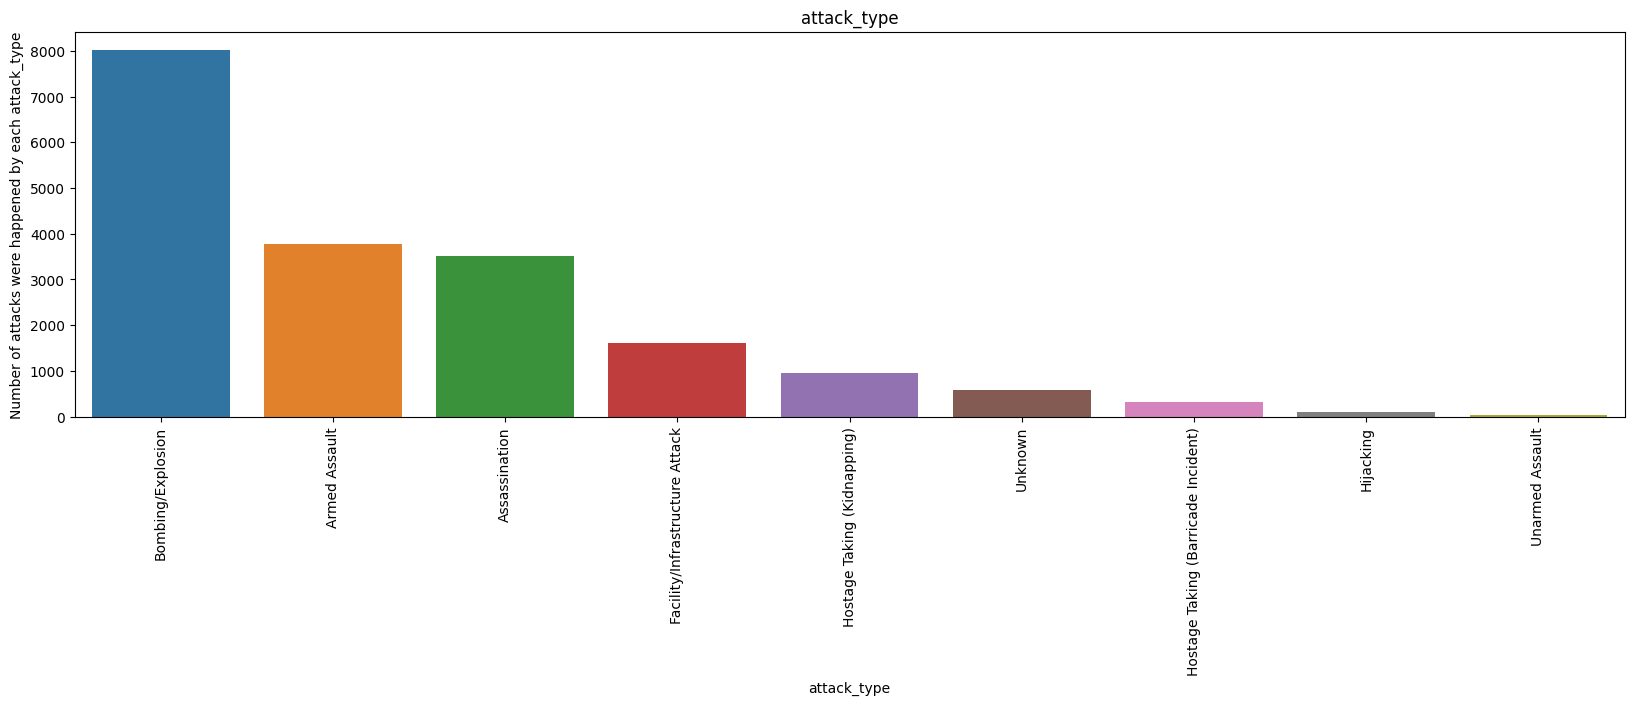

In [34]:
plt.figure(figsize=(20,5));
sns.barplot(x = dataset_updated['attack_type'].value_counts().index,y = dataset_updated['attack_type'].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel('attack_type')
plt.ylabel('Number of attacks were happened by each attack_type')
plt.title('attack_type')

Text(0.5, 1.0, 'attack_type')

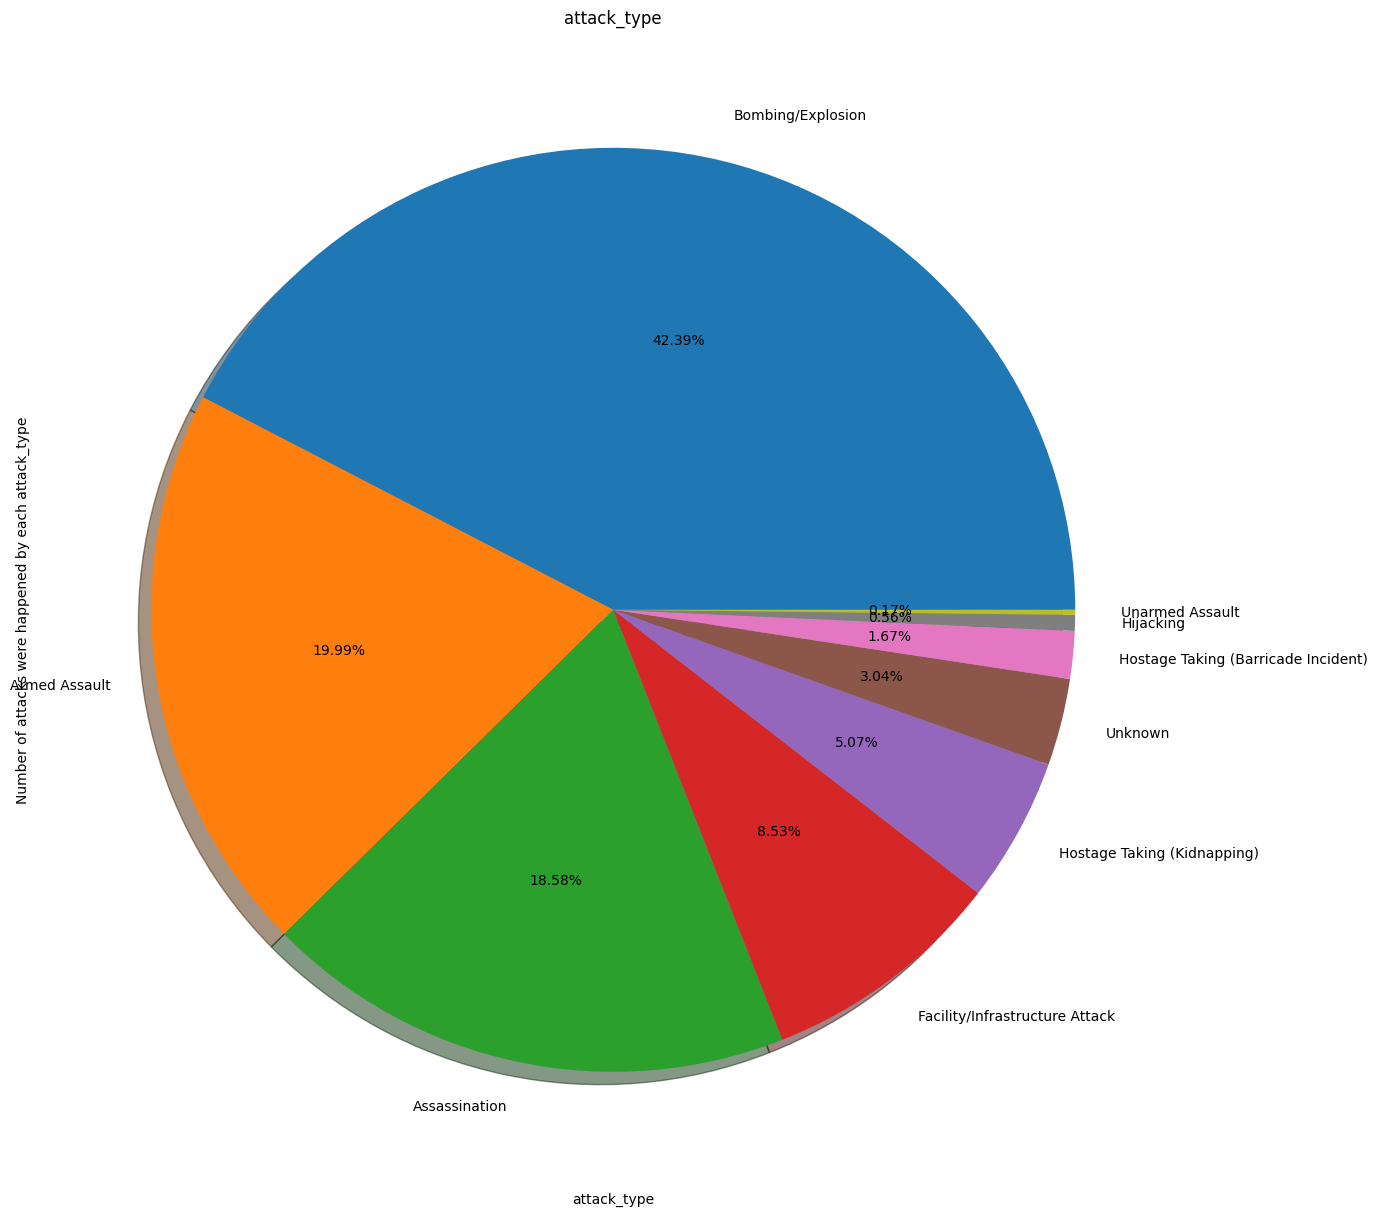

In [35]:
plt.figure(figsize=(90,15));
dataset_updated['attack_type'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%')

plt.xlabel('attack_type')
plt.ylabel('Number of attacks were happened by each attack_type')
plt.title('attack_type')

In [36]:
dataset_updated['weapon_type'].unique
dataset_updated['weapon_type'].value_counts()

Explosives                                                                     8140
Firearms                                                                       6682
Unknown                                                                        2062
Incendiary                                                                     1841
Melee                                                                           123
Chemical                                                                         35
Sabotage Equipment                                                               11
Other                                                                             8
Fake Weapons                                                                      4
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       2
Radiological                                                                      2
Biological                                                                  

Text(0.5, 1.0, 'weapon_type')

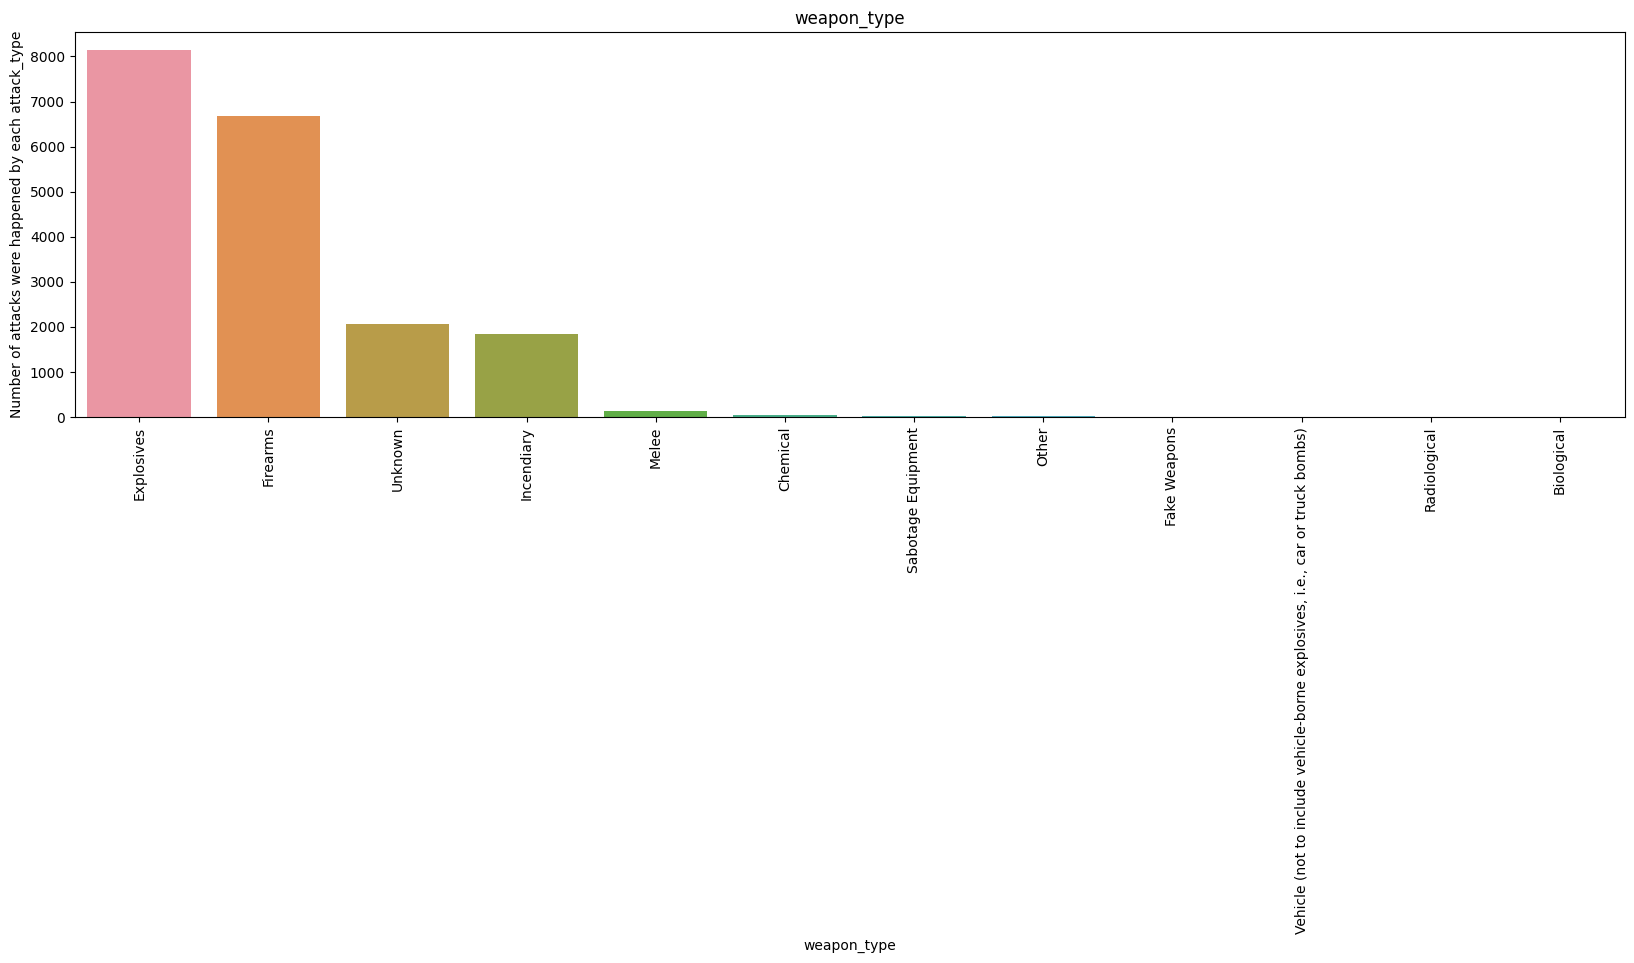

In [37]:
plt.figure(figsize=(20,5));
sns.barplot(x = dataset_updated['weapon_type'].value_counts().index,y = dataset_updated['weapon_type'].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel('weapon_type')
plt.ylabel('Number of attacks were happened by each attack_type')
plt.title('weapon_type')

Text(0.5, 1.0, 'weapon_type')

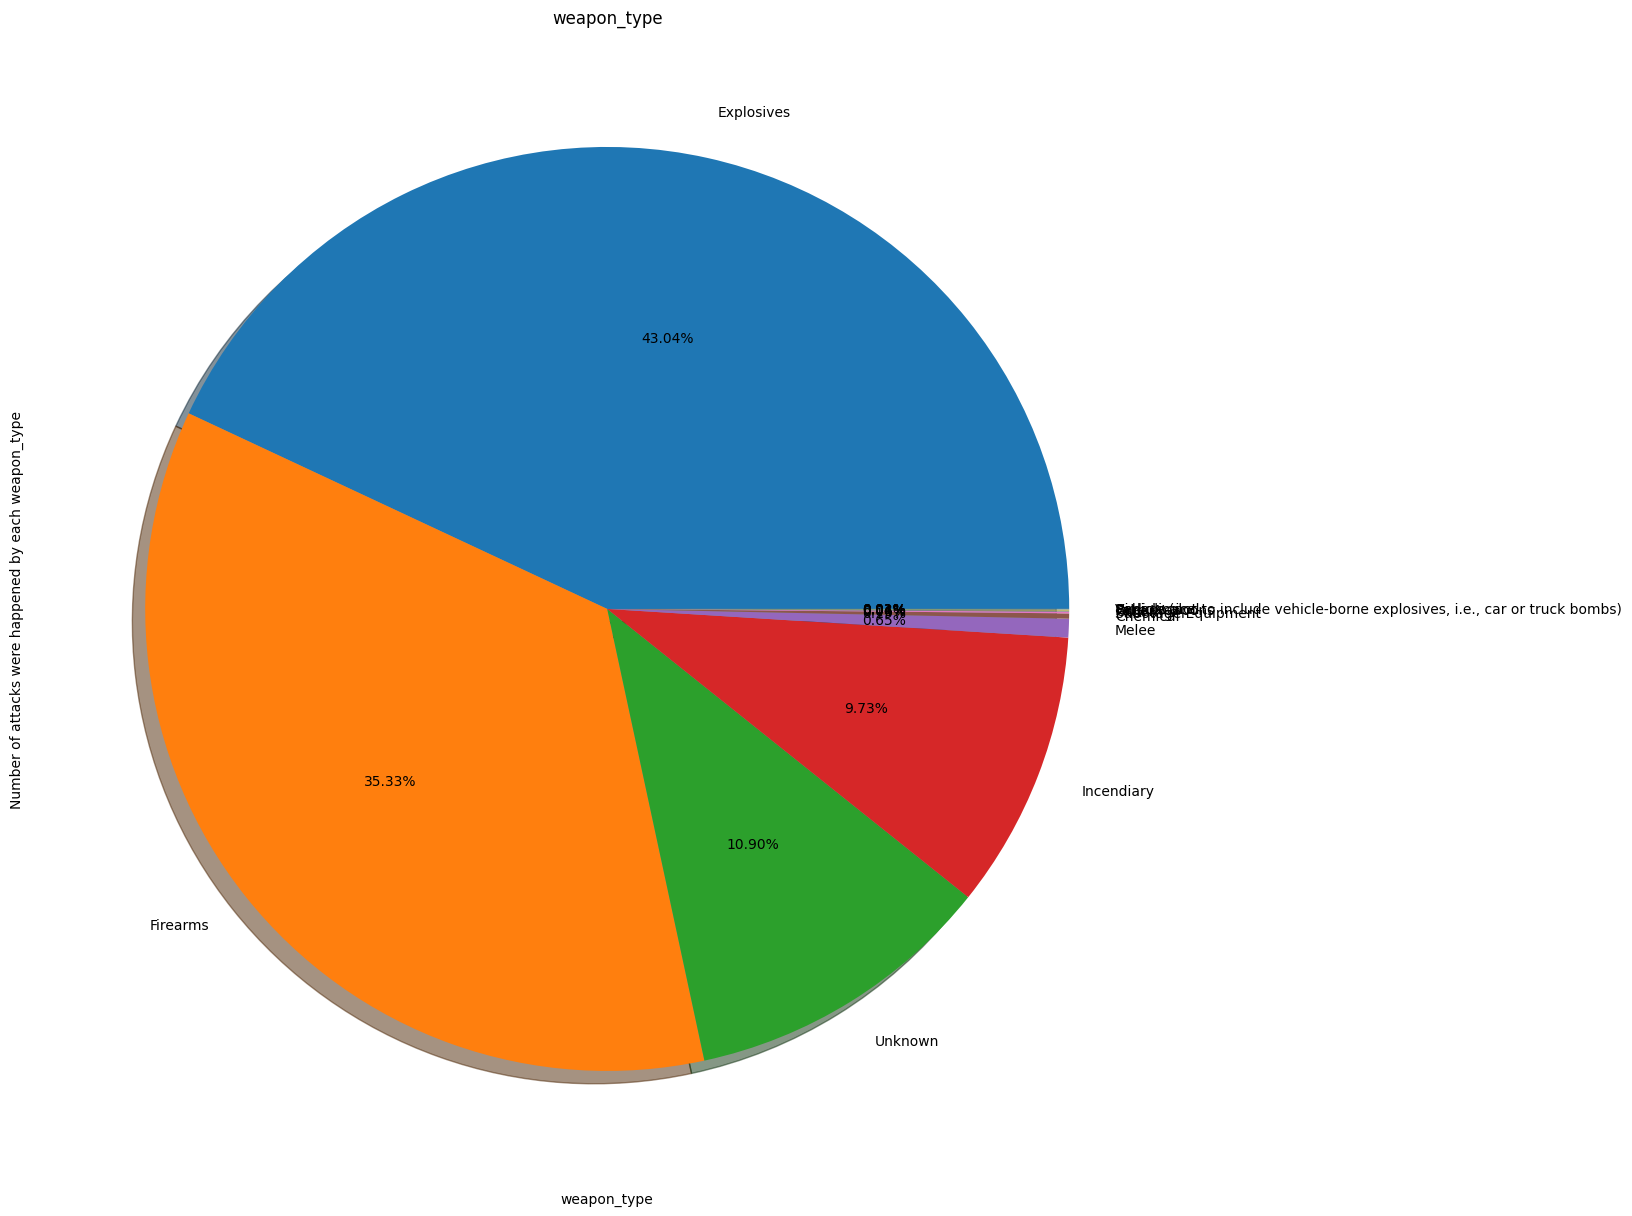

In [38]:
plt.figure(figsize = (90,15));
dataset_updated['weapon_type'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%')
plt.xlabel('weapon_type')
plt.ylabel('Number of attacks were happened by each weapon_type')
plt.title('weapon_type')

In [39]:
dataset_updated[dataset_updated['country_name']=='India']['state'].unique()

dataset_updated[dataset_updated['country_name']=='India']['state'].value_counts()

Assam             22
Delhi             13
Manipur           11
Mizoram            7
Punjab             7
Uttar Pradesh      3
Maharashtra        3
Unknown            3
Chandigarh         2
West Bengal        2
Tamil Nadu         2
Bihar              2
Jharkhand          2
Nagaland           1
Gujarat            1
Rajasthan          1
Andhra Pradesh     1
Chhattisgarh       1
Name: state, dtype: int64

Text(0.5, 1.0, 'india')

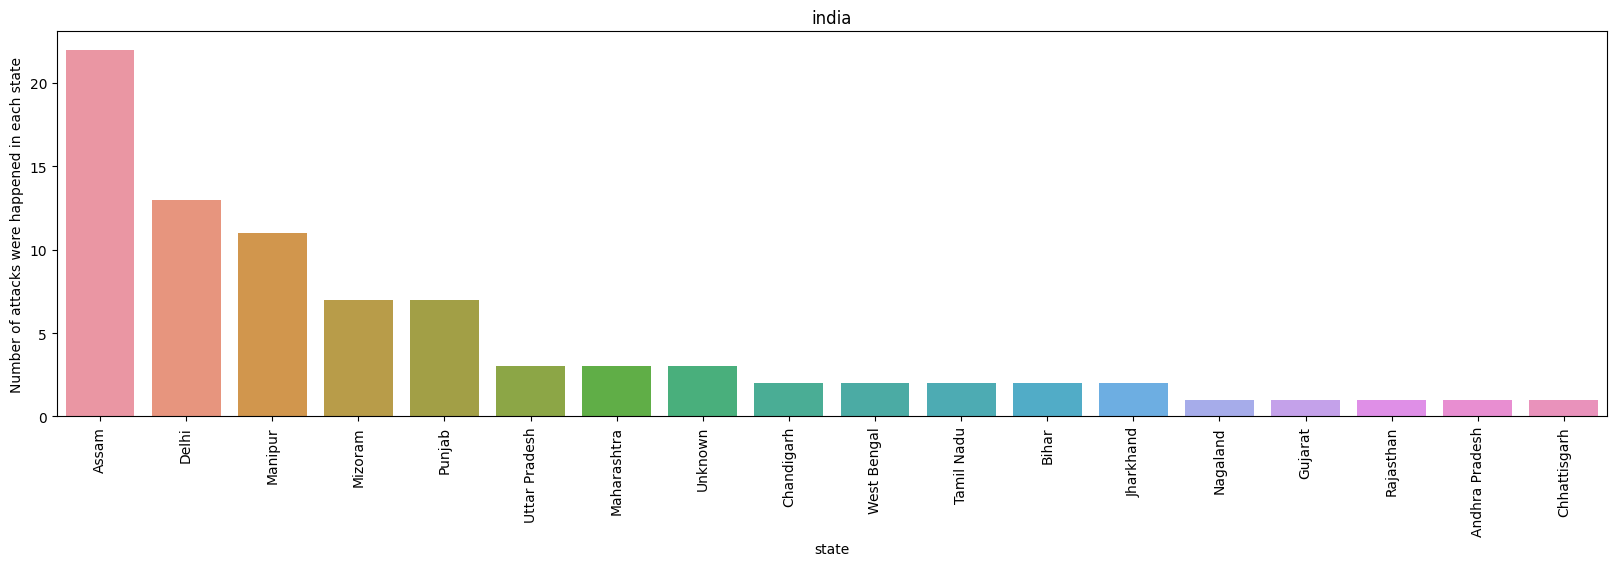

In [40]:
plt.figure(figsize=(20,5));
dataset_india=dataset_updated[dataset_updated['country_name']=='India']['state']
sns.barplot(x=dataset_india.value_counts().index,y=dataset_india.value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel('state')
plt.ylabel('Number of attacks were happened in each state')
plt.title('india')


Text(0.5, 1.0, 'india')

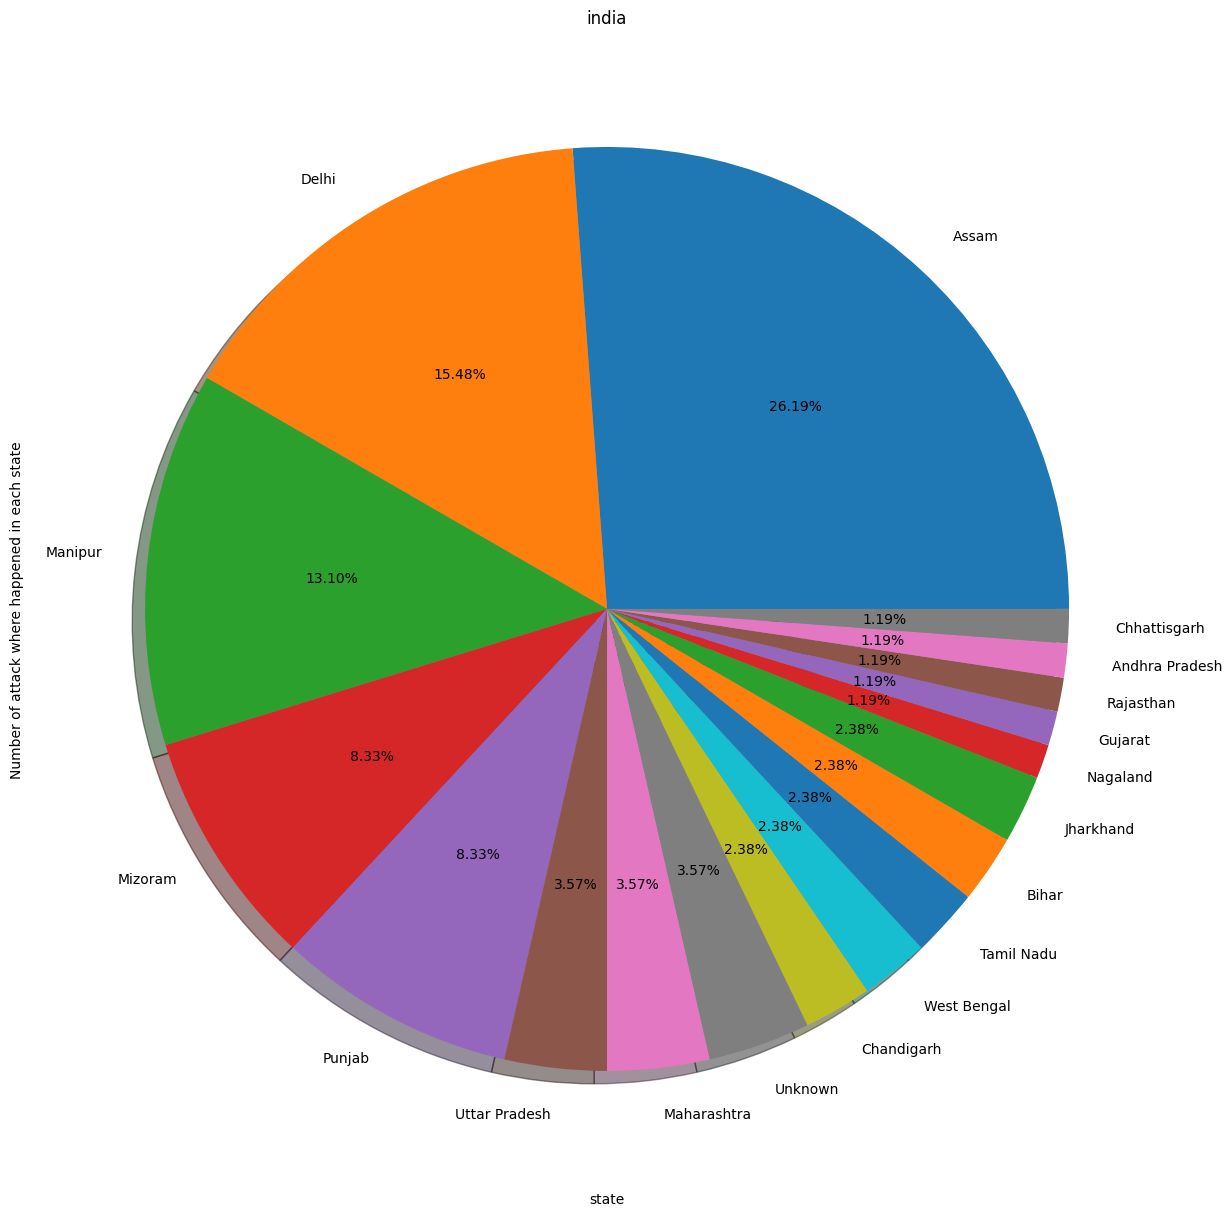

In [41]:
plt.figure(figsize=(90,15));
dataset_india.value_counts().plot.pie(shadow = True, autopct='%1.2f%%')

plt.xlabel('state')
plt.ylabel('Number of attack where happened in each state')
plt.title('india')